# **Tree-Based Models for Predicting Compressive Strength of High-Ultra Performance Concrete**

In [214]:
# import libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_squared_log_error, mean_absolute_percentage_error, make_scorer
import shap

import warnings
warnings.filterwarnings("ignore")


## **Data Collection and Pre-Processing**

In [215]:
# load the dataset 
concrete_df = pd.read_csv("data_uhpc.csv")

# display the first five rows 
concrete_df.head()

,C,S,SF,LP,QP,FA,NS,A,W,Fi,SP,T,Age,CS
0,450.0,0.0,50.0,0.0,0.0,0.0,0.0,1992.0,90.0,0.0,18.0,20,28,131.0
1,630.0,0.0,70.0,0.0,0.0,0.0,0.0,1788.0,126.0,0.0,18.0,20,28,135.0
2,810.0,0.0,90.0,0.0,0.0,0.0,0.0,1539.0,162.0,0.0,18.0,20,28,137.0
3,810.0,0.0,90.0,0.0,0.0,0.0,0.0,1539.0,162.0,0.0,18.0,20,28,137.0
4,630.0,180.0,90.0,0.0,0.0,0.0,0.0,1539.0,126.0,0.0,18.0,20,28,150.0


In [216]:
# display the data information 
concrete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810 entries, 0 to 809
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   C       810 non-null    float64
 1   S       810 non-null    float64
 2   SF      810 non-null    float64
 3   LP      810 non-null    float64
 4   QP      810 non-null    float64
 5   FA      810 non-null    float64
 6   NS      810 non-null    float64
 7   A       810 non-null    float64
 8   W       810 non-null    float64
 9   Fi      810 non-null    float64
 10  SP      810 non-null    float64
 11  T       810 non-null    int64  
 12  Age     810 non-null    int64  
 13  CS      810 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 88.7 KB


In [217]:
# check for duplicated rows 
concrete_df.duplicated().sum()

18

In [218]:
# remove the duplicated rows 
concrete_df.drop_duplicates(inplace = True)

In [219]:
# check for duplicated rows
concrete_df.duplicated().sum()

0

In [220]:
# check for missing data
concrete_df.isna().sum()

C      0
S      0
SF     0
LP     0
QP     0
FA     0
NS     0
A      0
W      0
Fi     0
SP     0
T      0
Age    0
CS     0
dtype: int64

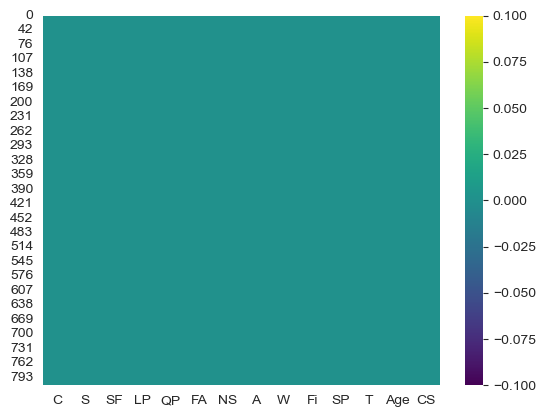

In [221]:
# visualize for missing data
sns.heatmap(concrete_df.isna(), annot = False, cmap = "viridis")
plt.show()

### **Summary of Statistical Analysis of the Concrete Materials Composition**

In [222]:
concrete_df.describe()

,C,S,SF,LP,QP,FA,NS,A,W,Fi,SP,T,Age,CS
count,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000
mean,738.119773,23.721717,137.196515,42.882449,32.956439,26.861869,3.721338,1144.751389,180.370985,56.530303,30.167992,23.994949,35.107323,122.089662
std,174.766003,73.307591,104.772464,134.485665,79.442754,68.107201,7.844318,310.636856,25.614469,75.379564,14.020023,16.386297,48.823088,40.011802
min,270.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.800000,90.000000,0.000000,1.100000,20.000000,1.000000,28.510000
25%,612.400000,0.000000,43.700000,0.000000,0.000000,0.000000,0.000000,873.000000,163.000000,0.000000,18.000000,21.000000,7.000000,94.597500
50%,770.500000,0.000000,144.000000,0.000000,0.000000,0.000000,0.000000,1104.000000,177.000000,0.000000,30.200000,21.000000,28.000000,120.900000
75%,852.000000,0.000000,220.000000,0.000000,0.000000,0.000000,4.000000,1282.300000,192.500000,156.000000,44.200000,23.000000,28.000000,151.000000
max,1251.200000,375.000000,433.700000,1058.200000,397.000000,356.000000,47.500000,1992.000000,272.600000,234.000000,57.000000,210.000000,365.000000,220.500000


### **Distribution Correlation of Input Parameters and Concrete Compressive Strength**

Pearson Correlation Coefficient: 0.3439
P-value: 0.0000


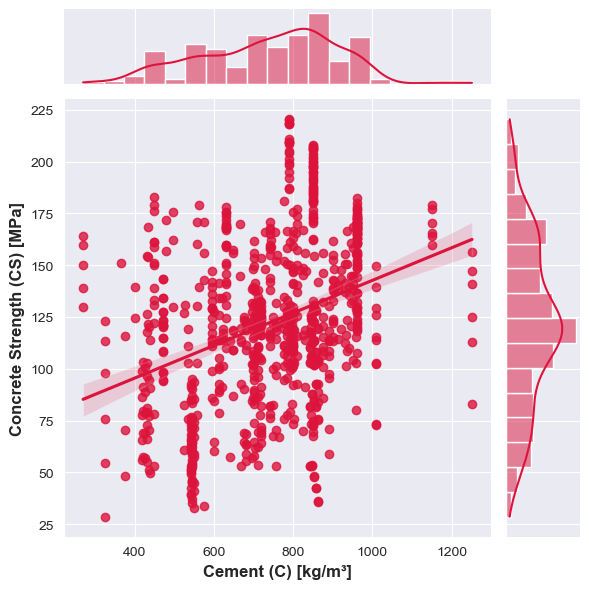

In [223]:
# association of the cement vs. concrete strength
cement_corr, cement_pval = pearsonr(x = concrete_df['C'], y = concrete_df['CS'])
print("Pearson Correlation Coefficient: {:.4f}".format(cement_corr))
print("P-value: {:.4f}".format(cement_pval))

sns.set_style("darkgrid")
sns.jointplot(x = "C", 
              y = "CS", 
              data = concrete_df, 
              color = "crimson", 
              kind = "reg")
plt.xlabel("Cement (C) [kg/m³]", fontsize = 12, fontweight = "bold")
plt.ylabel("Concrete Strength (CS) [MPa]", fontsize = 12, fontweight = "bold")
plt.tight_layout()
plt.show()

Pearson Correlation Coefficient: 0.0374
P-value: 0.2930


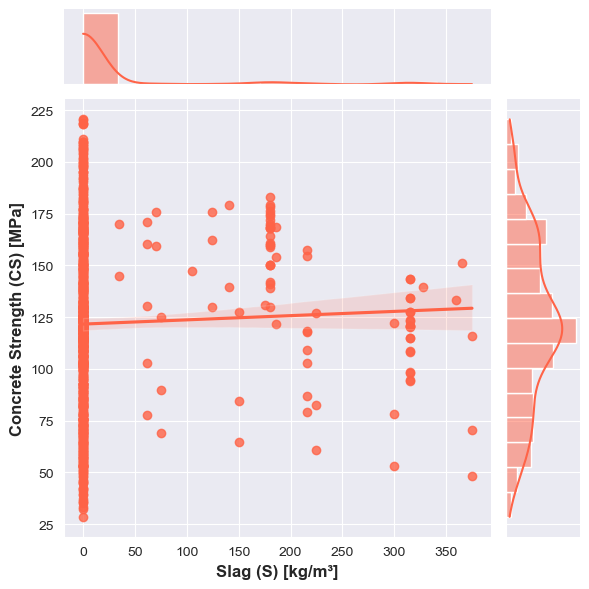

In [224]:
# association of the slag vs. concrete strength

slag_corr, slag_pval = pearsonr(x = concrete_df['S'], y = concrete_df['CS'])
print("Pearson Correlation Coefficient: {:.4f}".format(slag_corr))
print("P-value: {:.4f}".format(slag_pval))

sns.set_style("darkgrid")
sns.jointplot(x = "S", y = "CS", data = concrete_df, color = "tomato", kind = "reg")
plt.xlabel("Slag (S) [kg/m³]", fontsize = 12, fontweight = "bold")
plt.ylabel("Concrete Strength (CS) [MPa]", fontsize = 12, fontweight = "bold")
plt.tight_layout()
plt.show()

# the evidence is not strong enough to reject the null hypothesis 
# suggesting that there is not enough evidence for a correlation 

Pearson Correlation Coefficient: 0.5312
P-value: 0.0000


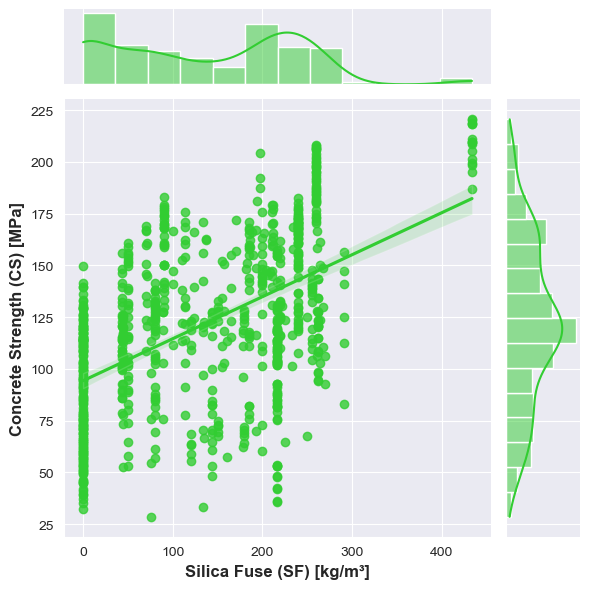

In [225]:
# association of the silica fuse vs. concrete strength

sf_corr, sf_pval = pearsonr(x = concrete_df['SF'], y = concrete_df['CS'])
print("Pearson Correlation Coefficient: {:.4f}".format(sf_corr))
print("P-value: {:.4f}".format(sf_pval))

sns.set_style("darkgrid")
sns.jointplot(x = "SF", 
                y = "CS", 
                data = concrete_df, 
                color = "limegreen", 
                kind = "reg")
plt.xlabel("Silica Fuse (SF) [kg/m³]", fontsize = 12, fontweight = "bold")
plt.ylabel("Concrete Strength (CS) [MPa]", fontsize = 12, fontweight = "bold")
plt.tight_layout()
plt.show()


Pearson Correlation Coefficient: -0.1145
P-value: 0.0012


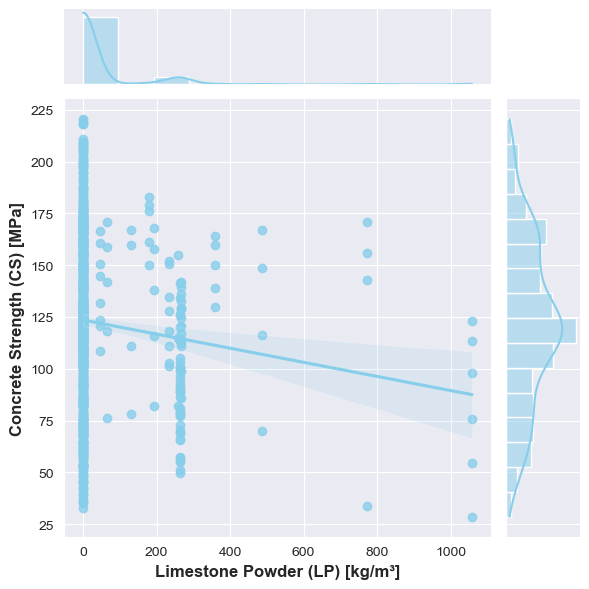

In [226]:
# association of the limestone powder vs. concrete strength

lp_corr, lp_pval = pearsonr(x = concrete_df['LP'], y = concrete_df['CS'])
print("Pearson Correlation Coefficient: {:.4f}".format(lp_corr))
print("P-value: {:.4f}".format(lp_pval))

sns.set_style("darkgrid")
sns.jointplot(x = "LP", 
              y = "CS", 
              data = concrete_df, 
              color = "skyblue", 
              kind = "reg")
plt.xlabel("Limestone Powder (LP) [kg/m³]", fontsize = 12, fontweight = "bold")
plt.ylabel("Concrete Strength (CS) [MPa]", fontsize = 12, fontweight = "bold")
plt.tight_layout()
plt.show()


Pearson Correlation Coefficient: 0.2344
P-value: 0.0000


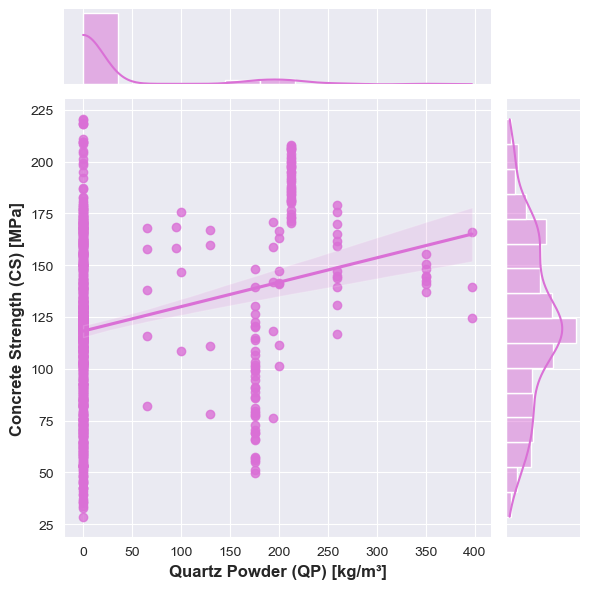

In [227]:
# association of the quartz powder vs. concrete strength

qp_corr, qp_pval = pearsonr(x = concrete_df['QP'], y = concrete_df['CS'])
print("Pearson Correlation Coefficient: {:.4f}".format(qp_corr))
print("P-value: {:.4f}".format(qp_pval))

sns.set_style("darkgrid")
sns.jointplot(x = "QP", 
                y = "CS", 
                data = concrete_df, 
                color = "orchid",
                kind = "reg")
plt.xlabel("Quartz Powder (QP) [kg/m³]", fontsize = 12, fontweight = "bold")
plt.ylabel("Concrete Strength (CS) [MPa]", fontsize = 12, fontweight = "bold")
plt.tight_layout()
plt.show()


Pearson Correlation Coefficient: -0.0490
P-value: 0.1685


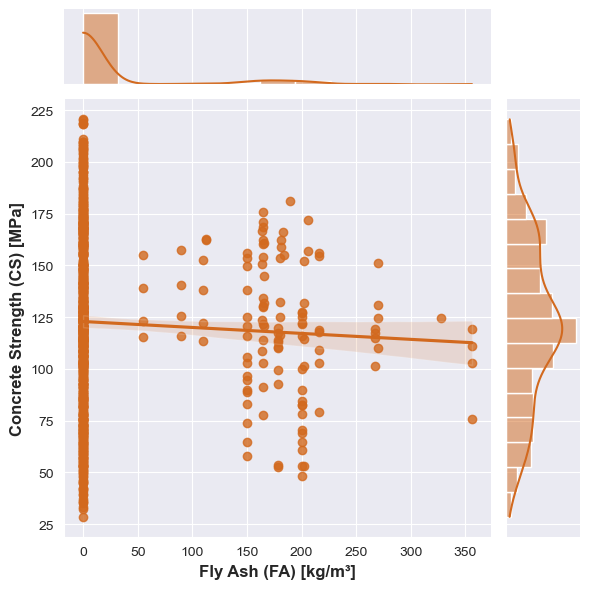

In [228]:
# association of the fly ash vs. concrete strength

fa_corr, fa_pval = pearsonr(x = concrete_df['FA'], y = concrete_df['CS'])
print("Pearson Correlation Coefficient: {:.4f}".format(fa_corr))
print("P-value: {:.4f}".format(fa_pval))

sns.set_style("darkgrid")
sns.jointplot(x = "FA", 
              y = "CS", 
              data = concrete_df, 
              color = "chocolate", 
              kind = "reg")
plt.xlabel("Fly Ash (FA) [kg/m³]", fontsize = 12, fontweight = "bold")
plt.ylabel("Concrete Strength (CS) [MPa]", fontsize = 12, fontweight = "bold")
plt.tight_layout()
plt.show()

# the evidence is not strong enough to reject the null hypothesis 
# suggesting that there is not enough evidence for a correlation 

Pearson Correlation Coefficient: -0.1975
P-value: 0.0000


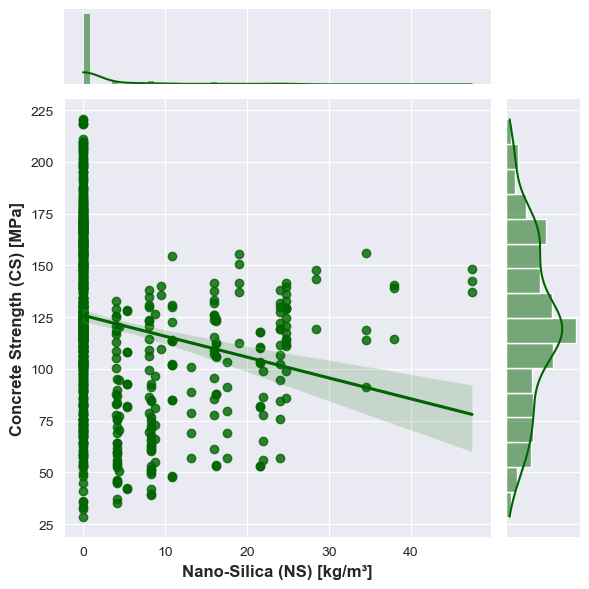

In [229]:
# association of the nano-silica vs. concrete strength

ns_corr, ns_pval = pearsonr(x = concrete_df['NS'], y = concrete_df['CS'])
print("Pearson Correlation Coefficient: {:.4f}".format(ns_corr))
print("P-value: {:.4f}".format(ns_pval))

sns.set_style("darkgrid")
sns.jointplot(x = "NS", 
                y = "CS", 
                data = concrete_df, 
                color = "darkgreen", 
                kind = "reg")
plt.xlabel("Nano-Silica (NS) [kg/m³]", fontsize = 12, fontweight = "bold")
plt.ylabel("Concrete Strength (CS) [MPa]", fontsize = 12, fontweight = "bold")
plt.tight_layout()
plt.show()

Pearson Correlation Coefficient: -0.4275
P-value: 0.0000


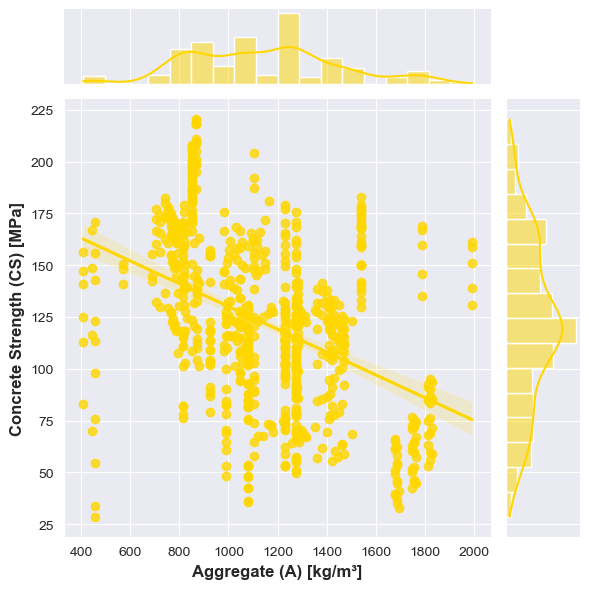

In [230]:
# association of the aggregate vs. concrete strength

agg_corr, agg_pval = pearsonr(x = concrete_df['A'], y = concrete_df['CS'])
print("Pearson Correlation Coefficient: {:.4f}".format(agg_corr))
print("P-value: {:.4f}".format(agg_pval))

sns.set_style("darkgrid")
sns.jointplot(x = "A", 
              y = "CS", 
              data = concrete_df, 
              color = "gold", 
              kind = "reg")
plt.xlabel("Aggregate (A) [kg/m³]", fontsize = 12, fontweight = "bold")
plt.ylabel("Concrete Strength (CS) [MPa]", fontsize = 12, fontweight = "bold")
plt.tight_layout()
plt.show()

Pearson Correlation Coefficient: 0.1099
P-value: 0.0019


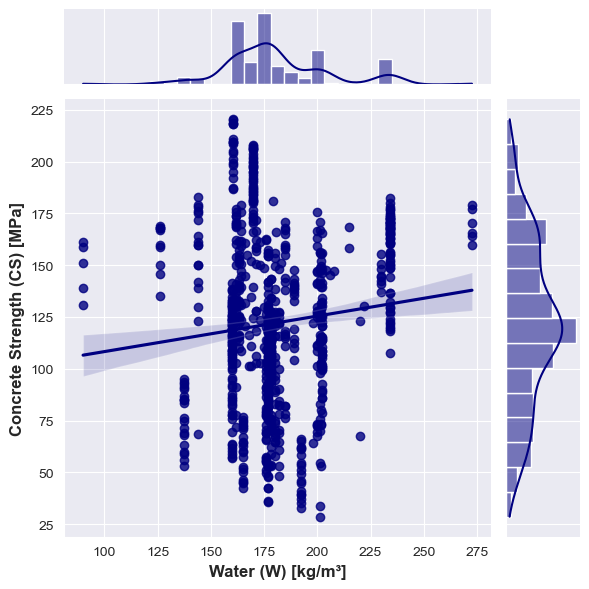

In [231]:
# association of the water vs. concrete strength

water_corr, water_pval = pearsonr(x = concrete_df['W'], y = concrete_df['CS'])
print("Pearson Correlation Coefficient: {:.4f}".format(water_corr))
print("P-value: {:.4f}".format(water_pval))

sns.set_style("darkgrid")
sns.jointplot(x = "W", 
              y = "CS", 
              data = concrete_df, 
              color = "navy", 
              kind = "reg")
plt.xlabel("Water (W) [kg/m³]", fontsize = 12, fontweight = "bold")
plt.ylabel("Concrete Strength (CS) [MPa]", fontsize = 12, fontweight = "bold")
plt.tight_layout()
plt.show()

Pearson Correlation Coefficient: 0.4546
P-value: 0.0000


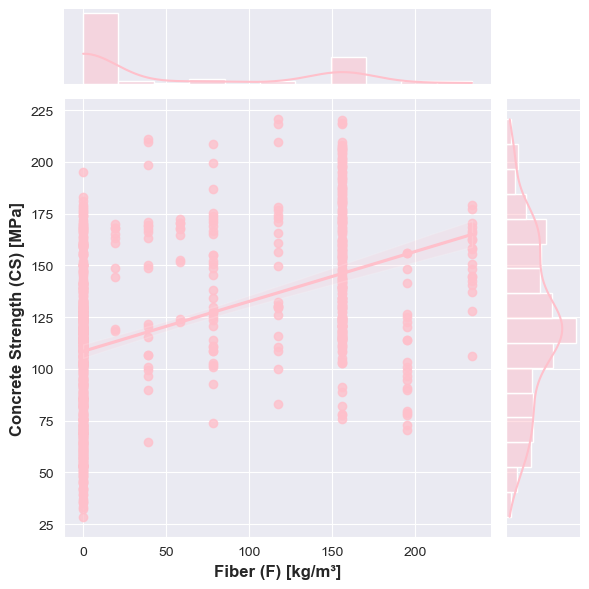

In [232]:
# association of the fiber vs. concrete strength

fiber_corr, fiber_pval = pearsonr(x = concrete_df['Fi'], y = concrete_df['CS'])
print("Pearson Correlation Coefficient: {:.4f}".format(fiber_corr))
print("P-value: {:.4f}".format(fiber_pval))

sns.set_style("darkgrid")
sns.jointplot(x = "Fi", 
              y = "CS", 
              data = concrete_df, 
              color = "pink", 
              kind = "reg")
plt.xlabel("Fiber (F) [kg/m³]", fontsize = 12, fontweight = "bold")
plt.ylabel("Concrete Strength (CS) [MPa]", fontsize = 12, fontweight = "bold")
plt.tight_layout()
plt.show()

Pearson Correlation Coefficient: 0.4131
P-value: 0.0000


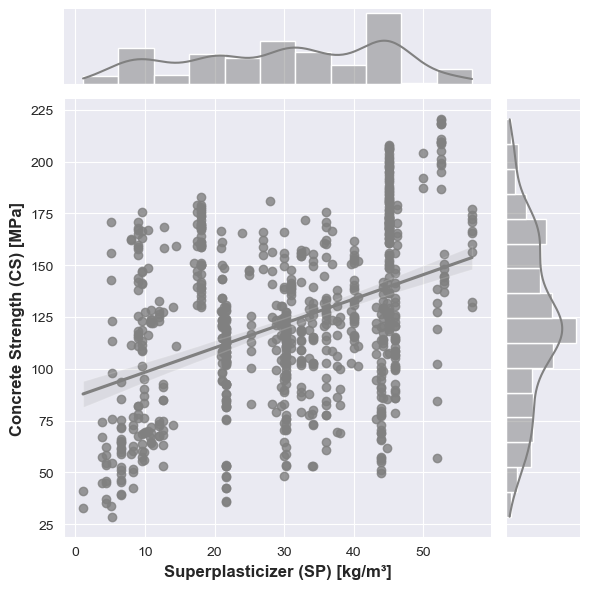

In [233]:
# association of the superplasticizer vs. concrete strength

sp_corr, sp_pval = pearsonr(x = concrete_df['SP'], y = concrete_df['CS'])
print("Pearson Correlation Coefficient: {:.4f}".format(sp_corr))
print("P-value: {:.4f}".format(sp_pval))

sns.set_style("darkgrid")
sns.jointplot(x = "SP", 
              y = "CS", 
              data = concrete_df, 
              color = "grey", 
              kind = "reg")
plt.xlabel("Superplasticizer (SP) [kg/m³]", fontsize = 12, fontweight = "bold")
plt.ylabel("Concrete Strength (CS) [MPa]", fontsize = 12, fontweight = "bold")
plt.tight_layout()
plt.show()

Pearson Correlation Coefficient: 0.1583
P-value: 0.0000


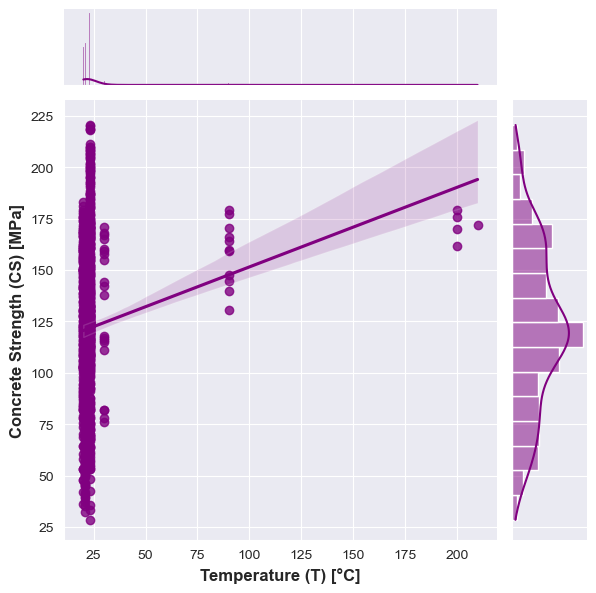

In [234]:
# association of the temperature vs. concrete strength

temp_corr, temp_pval = pearsonr(x = concrete_df['T'], y = concrete_df['CS'])
print("Pearson Correlation Coefficient: {:.4f}".format(temp_corr))
print("P-value: {:.4f}".format(temp_pval))

sns.set_style("darkgrid")
sns.jointplot(x = "T", 
              y = "CS", 
              data = concrete_df, 
              color = "purple", 
              kind = "reg")
plt.xlabel("Temperature (T) [°C]", fontsize = 12, fontweight = "bold")
plt.ylabel("Concrete Strength (CS) [MPa]", fontsize = 12, fontweight = "bold")
plt.show()

Pearson Correlation Coefficient: 0.4119
P-value: 0.0000


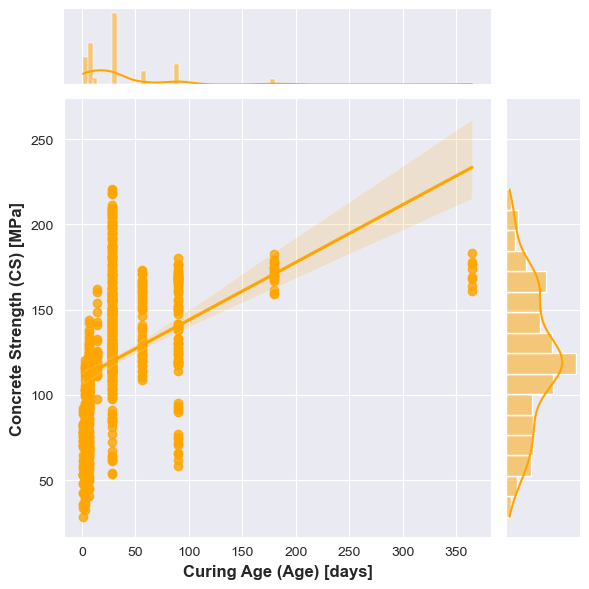

In [235]:
# association of the curing age vs. concrete strength

age_corr, age_pval = pearsonr(x = concrete_df['Age'], y = concrete_df['CS'])
print("Pearson Correlation Coefficient: {:.4f}".format(age_corr))
print("P-value: {:.4f}".format(age_pval))

sns.set_style("darkgrid")
sns.jointplot(x = "Age", 
              y = "CS", 
              data = concrete_df, 
              color = "orange", 
              kind = "reg")
plt.xlabel("Curing Age (Age) [days]", fontsize = 12, fontweight = "bold")
plt.ylabel("Concrete Strength (CS) [MPa]", fontsize = 12, fontweight = "bold")
plt.tight_layout()
plt.show()

### **Pearson Correlation Heatmap between Quantitative Variables**

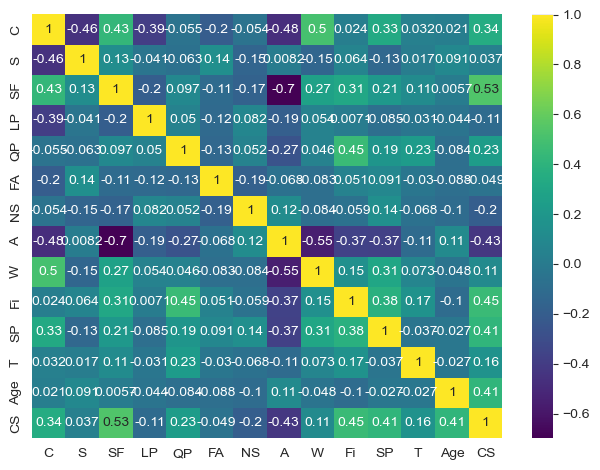

In [236]:
sns.heatmap(concrete_df.corr(), annot = True, cmap = "viridis")
plt.tight_layout()
plt.show()

### **Outliers Analysis of Input Parameters**

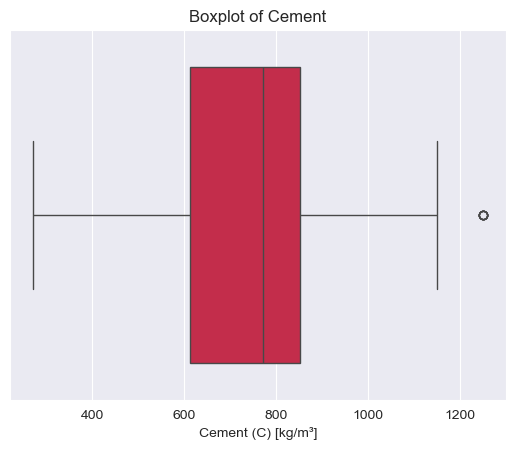

In [237]:
sns.set_style("darkgrid")
sns.boxplot(x = "C", data = concrete_df, color = "crimson")
plt.title("Boxplot of Cement")
plt.xlabel("Cement (C) [kg/m³]")
plt.show()


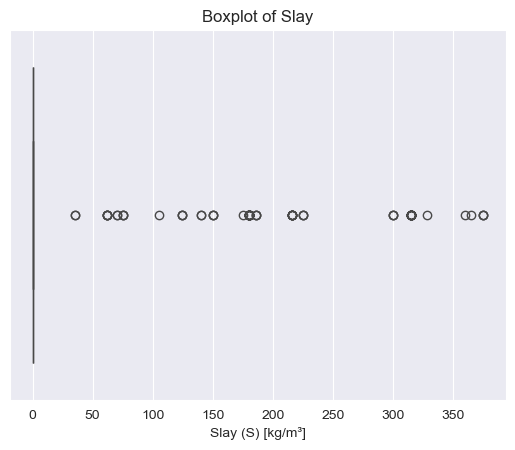

In [238]:
sns.set_style("darkgrid")
sns.boxplot(x = "S", data = concrete_df, color = "chocolate")
plt.title("Boxplot of Slay")
plt.xlabel("Slay (S) [kg/m³]")
plt.show()

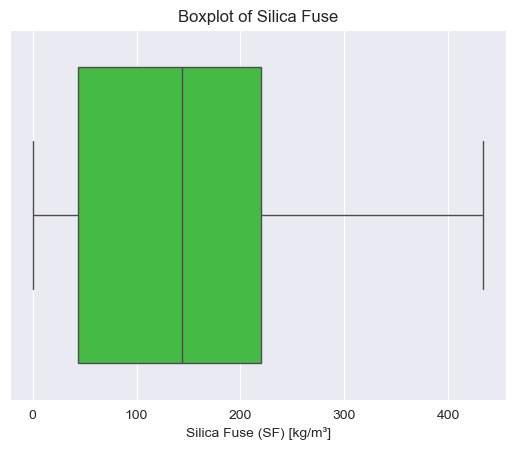

In [239]:
sns.set_style("darkgrid")
sns.boxplot(x = "SF", data = concrete_df, color = "limegreen")
plt.title("Boxplot of Silica Fuse")
plt.xlabel("Silica Fuse (SF) [kg/m³]")
plt.show()

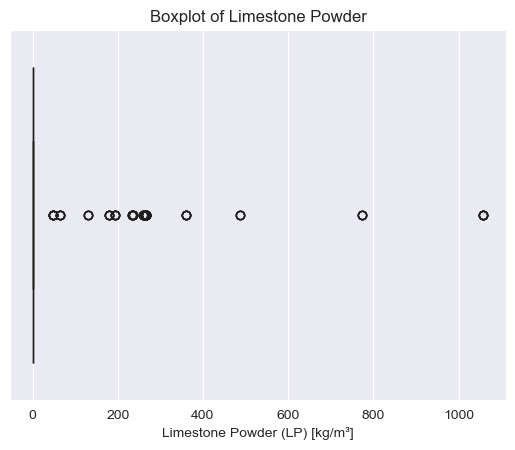

In [240]:
sns.set_style("darkgrid")
sns.boxplot(x = "LP", data = concrete_df, color = "darkgreen")
plt.title("Boxplot of Limestone Powder")
plt.xlabel("Limestone Powder (LP) [kg/m³]")
plt.show()

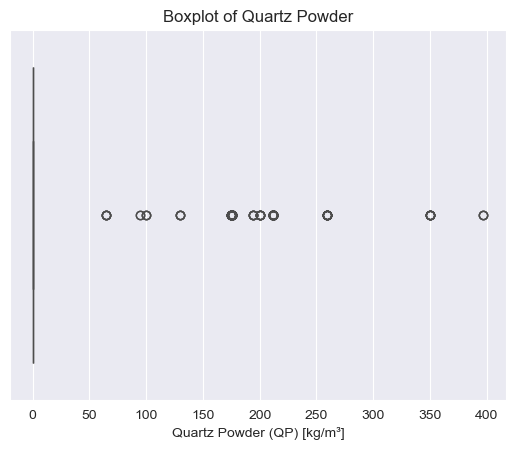

In [241]:
sns.set_style("darkgrid")
sns.boxplot(x = "QP", data = concrete_df, color = "gold")
plt.title("Boxplot of Quartz Powder")
plt.xlabel("Quartz Powder (QP) [kg/m³]")
plt.show()

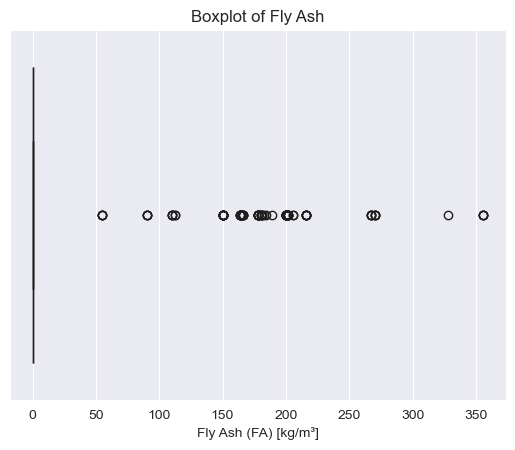

In [242]:
sns.set_style("darkgrid")
sns.boxplot(x = "FA", data = concrete_df, color = "darkgreen")
plt.title("Boxplot of Fly Ash")
plt.xlabel("Fly Ash (FA) [kg/m³]")
plt.show()

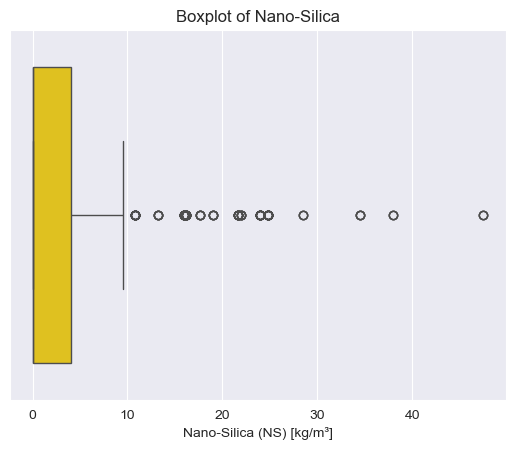

In [243]:
sns.set_style("darkgrid")
sns.boxplot(x = "NS", data = concrete_df, color = "gold")
plt.title("Boxplot of Nano-Silica")
plt.xlabel("Nano-Silica (NS) [kg/m³]")
plt.show()

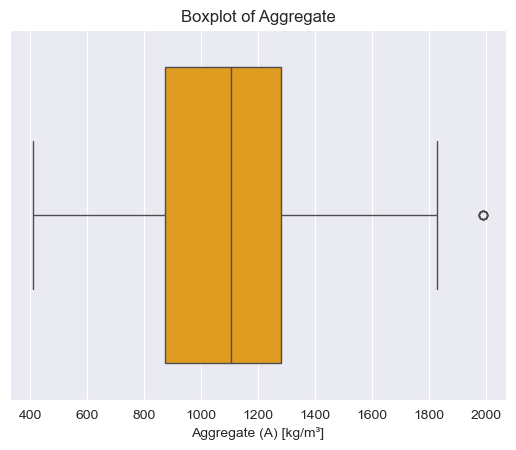

In [244]:
sns.set_style("darkgrid")
sns.boxplot(x = "A", data = concrete_df, color = "orange")
plt.title("Boxplot of Aggregate")
plt.xlabel("Aggregate (A) [kg/m³]")
plt.show()

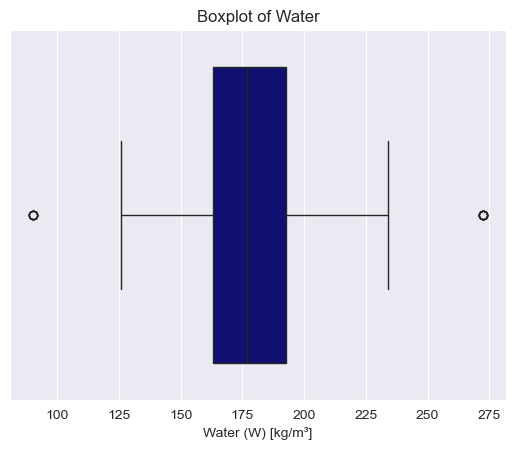

In [245]:
sns.set_style("darkgrid")
sns.boxplot(x = "W", data = concrete_df, color = "navy")
plt.title("Boxplot of Water")
plt.xlabel("Water (W) [kg/m³]")
plt.show()

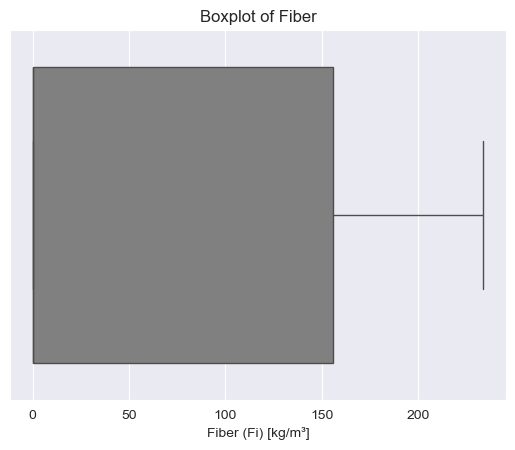

In [246]:
sns.set_style("darkgrid")
sns.boxplot(x = "Fi", data = concrete_df, color = "grey")
plt.title("Boxplot of Fiber")
plt.xlabel("Fiber (Fi) [kg/m³]")
plt.show()

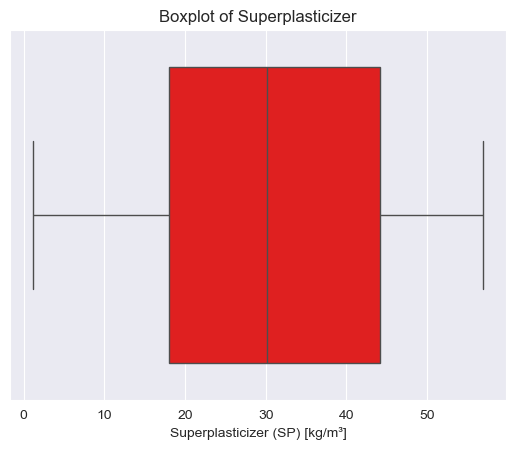

In [247]:
sns.set_style("darkgrid")
sns.boxplot(x = "SP", data = concrete_df, color = "red")
plt.title("Boxplot of Superplasticizer")
plt.xlabel("Superplasticizer (SP) [kg/m³]")
plt.show()

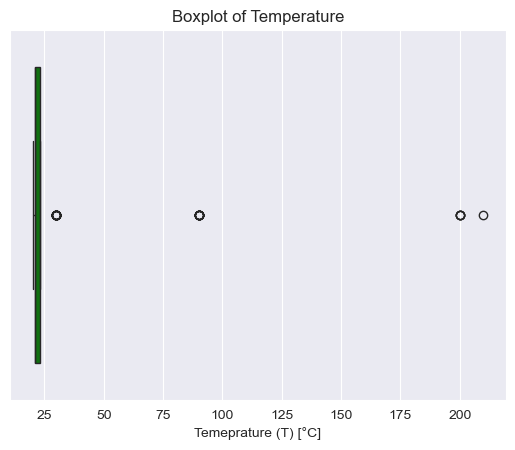

In [248]:
sns.set_style("darkgrid")
sns.boxplot(x = "T", data = concrete_df, color = "green")
plt.title("Boxplot of Temperature")
plt.xlabel("Temeprature (T) [°C]")
plt.show()

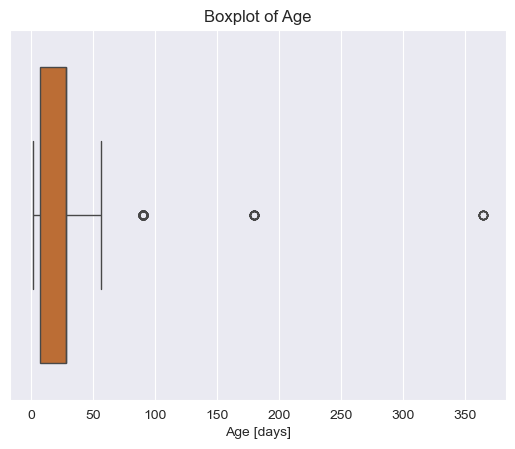

In [249]:
sns.set_style("darkgrid")
sns.boxplot(x = "Age", data = concrete_df, color = "chocolate")
plt.title("Boxplot of Age")
plt.xlabel("Age [days]")
plt.show()

### **Feature Selection**

In [250]:
# drop variables that shows no correlation with the concrete compressive strength
concrete_df = concrete_df.drop(['S', 'FA'],axis = 1)
# print the first five rows 
concrete_df.head()

,C,SF,LP,QP,NS,A,W,Fi,SP,T,Age,CS
0,450.0,50.0,0.0,0.0,0.0,1992.0,90.0,0.0,18.0,20,28,131.0
1,630.0,70.0,0.0,0.0,0.0,1788.0,126.0,0.0,18.0,20,28,135.0
2,810.0,90.0,0.0,0.0,0.0,1539.0,162.0,0.0,18.0,20,28,137.0
4,630.0,90.0,0.0,0.0,0.0,1539.0,126.0,0.0,18.0,20,28,150.0
5,630.0,90.0,0.0,0.0,0.0,1539.0,144.0,0.0,18.0,20,28,142.0


### **Split the Concrete Data**

In [251]:
# split the concrete data into 80% training and 20% testing 
X_train, X_test, y_train, y_test = train_test_split(concrete_df.drop(['CS'], axis = 1), 
                                                    concrete_df['CS'], 
                                                    test_size = 0.2, 
                                                    random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(633, 11)
(159, 11)
(633,)
(159,)


### **Standardization of Input Parameters**

In [252]:
rs = RobustScaler()
X_train_robustScaled = rs.fit_transform(X_train)
X_test_robustScaled = rs.transform(X_test)

In [253]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train_robustScaled)
X_test_scaled = ss.transform(X_test_robustScaled)

## **Initial Modelling - Default Hyperparameters Settings**

### **Decision Tree Regressor**

In [254]:
# create an initial decision tree regressot object
dtc_initial = DecisionTreeRegressor(random_state = 42)
# fit the model to the training data 
dtc_initial.fit(X_train_scaled, y_train)

DecisionTreeRegressor(random_state=42)

In [255]:
# predict on the training set 
y_pred_train_dtc_initial = dtc_initial.predict(X_train_scaled)
# predict on the testing set
y_pred_test_dtc_initial = dtc_initial.predict(X_test_scaled)

In [256]:
# calculate evaluation metrics for the initial decision tree model on the training set
r2_train_dtc_initial = r2_score(y_train, y_pred_train_dtc_initial)
mae_train_dtc_initial = mean_absolute_error(y_train, y_pred_train_dtc_initial)
mse_train_dtc_initial = mean_squared_error(y_train, y_pred_train_dtc_initial)
rmse_train_dtc_initial = np.sqrt(mean_squared_error(y_train, y_pred_train_dtc_initial))
rmsle_train_dtc_initial = np.sqrt(mean_squared_log_error(y_train, y_pred_train_dtc_initial))
mape_train_dtc_initial = mean_absolute_percentage_error(y_train, y_pred_train_dtc_initial)

# calculate evaluation metrics for the initial decision tree model on the testing set 
r2_test_dtc_initial = r2_score(y_test, y_pred_test_dtc_initial)
mae_test_dtc_initial = mean_absolute_error(y_test, y_pred_test_dtc_initial)
mse_test_dtc_initial = mean_squared_error(y_test, y_pred_test_dtc_initial)
rmse_test_dtc_initial = np.sqrt(mean_squared_error(y_test, y_pred_test_dtc_initial))
rmsle_test_dtc_initial = np.sqrt(mean_squared_log_error(y_test, y_pred_test_dtc_initial))
mape_test_dtc_initial = mean_absolute_percentage_error(y_test, y_pred_test_dtc_initial)


print("Training Set: ")
print("=============================")
print("R2: {:.4f}".format(r2_train_dtc_initial))
print("MAE: {:.4f}".format(mae_train_dtc_initial))
print("MSE: {:.4f}".format(mse_train_dtc_initial))
print("RMSE: {:.4f}".format(rmse_train_dtc_initial))
print("RMSLE: {:.4f}".format(rmsle_train_dtc_initial))
print("MAPE: {:.4f}".format(mape_train_dtc_initial))
print()

print("Testing Set: ")
print("=============================")
print("R2: {:.4f}".format(r2_test_dtc_initial))
print("MAE: {:.4f}".format(mae_test_dtc_initial))
print("MSE: {:.4f}".format(mse_test_dtc_initial))
print("RMSE: {:.4f}".format(rmse_test_dtc_initial))
print("RMSLE: {:.4f}".format(rmsle_test_dtc_initial))
print("MAPE: {:.4f}".format(mape_test_dtc_initial))

Training Set: 
R2: 0.9928
MAE: 1.1656
MSE: 11.4299
RMSE: 3.3808
RMSLE: 0.0223
MAPE: 0.0083

Testing Set: 
R2: 0.9404
MAE: 6.9260
MSE: 98.3424
RMSE: 9.9168
RMSLE: 0.0968
MAPE: 0.0605


### **Random Forest Regressor**

In [257]:
# create an initial random forest regressor object
rfc_initial = RandomForestRegressor(random_state = 42)
# fit the model to the training data 
rfc_initial.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [258]:
# predict on the training set 
y_pred_train_rfc_initial = rfc_initial.predict(X_train_scaled)
# predict on the testing set
y_pred_test_rfc_initial = rfc_initial.predict(X_test_scaled)

In [259]:
# calculate evaluation metrics for the initial random forest model on the training set
r2_train_rfc_initial = r2_score(y_train, y_pred_train_rfc_initial)
mae_train_rfc_initial = mean_absolute_error(y_train, y_pred_train_rfc_initial)
mse_train_rfc_initial = mean_squared_error(y_train, y_pred_train_rfc_initial)
rmse_train_rfc_initial = np.sqrt(mean_squared_error(y_train, y_pred_train_rfc_initial))
rmsle_train_rfc_initial = np.sqrt(mean_squared_log_error(y_train, y_pred_train_rfc_initial))
mape_train_rfc_initial = mean_absolute_percentage_error(y_train, y_pred_train_rfc_initial)

# calculate evaluation metrics for the initial random forest model on the testing set 
r2_test_rfc_initial = r2_score(y_test, y_pred_test_rfc_initial)
mae_test_rfc_initial = mean_absolute_error(y_test, y_pred_test_rfc_initial)
mse_test_rfc_initial = mean_squared_error(y_test, y_pred_test_rfc_initial)
rmse_test_rfc_initial = np.sqrt(mean_squared_error(y_test, y_pred_test_rfc_initial))
rmsle_test_rfc_initial = np.sqrt(mean_squared_log_error(y_test, y_pred_test_rfc_initial))
mape_test_rfc_initial = mean_absolute_percentage_error(y_test, y_pred_test_rfc_initial)


print("Training Set: ")
print("=============================")
print("R2: {:.4f}".format(r2_train_rfc_initial))
print("MAE: {:.4f}".format(mae_train_rfc_initial))
print("MSE: {:.4f}".format(mse_train_rfc_initial))
print("RMSE: {:.4f}".format(rmse_train_rfc_initial))
print("RMSLE: {:.4f}".format(rmsle_train_rfc_initial))
print("MAPE: {:.4f}".format(mape_train_rfc_initial))
print()

print("Testing Set: ")
print("=============================")
print("R2: {:.4f}".format(r2_test_rfc_initial))
print("MAE: {:.4f}".format(mae_test_rfc_initial))
print("MSE: {:.4f}".format(mse_test_rfc_initial))
print("RMSE: {:.4f}".format(rmse_test_rfc_initial))
print("RMSLE: {:.4f}".format(rmsle_test_rfc_initial))
print("MAPE: {:.4f}".format(mape_test_rfc_initial))

Training Set: 
R2: 0.9877
MAE: 2.8850
MSE: 19.4657
RMSE: 4.4120
RMSLE: 0.0365
MAPE: 0.0247

Testing Set: 
R2: 0.9674
MAE: 5.3521
MSE: 53.8164
RMSE: 7.3360
RMSLE: 0.0741
MAPE: 0.0503


### **Gradient Boosting Regressor**

In [260]:
# create an initial gradient boosting regressor object
gbr_initial = GradientBoostingRegressor(random_state = 42)
# fit the model to the training data 
gbr_initial.fit(X_train_scaled, y_train)

GradientBoostingRegressor(random_state=42)

In [261]:
# predict on the training set 
y_pred_train_gbr_initial = gbr_initial.predict(X_train_scaled)
# predict on the testing set
y_pred_test_gbr_initial = gbr_initial.predict(X_test_scaled)

In [262]:
# calculate evaluation metrics for the initial gradient boosting regressor model on the training set
r2_train_gbr_initial = r2_score(y_train, y_pred_train_gbr_initial)
mae_train_gbr_initial = mean_absolute_error(y_train, y_pred_train_gbr_initial)
mse_train_gbr_initial = mean_squared_error(y_train, y_pred_train_gbr_initial)
rmse_train_gbr_initial = np.sqrt(mean_squared_error(y_train, y_pred_train_gbr_initial))
rmsle_train_gbr_initial = np.sqrt(mean_squared_log_error(y_train, y_pred_train_gbr_initial))
mape_train_gbr_initial = mean_absolute_percentage_error(y_train, y_pred_train_gbr_initial)

# calculate evaluation metrics for the initial gradient boosting regressor model on the testing set 
r2_test_gbr_initial = r2_score(y_test, y_pred_test_gbr_initial)
mae_test_gbr_initial = mean_absolute_error(y_test, y_pred_test_gbr_initial)
mse_test_gbr_initial = mean_squared_error(y_test, y_pred_test_gbr_initial)
rmse_test_gbr_initial = np.sqrt(mean_squared_error(y_test, y_pred_test_gbr_initial))
rmsle_test_gbr_initial = np.sqrt(mean_squared_log_error(y_test, y_pred_test_gbr_initial))
mape_test_gbr_initial = mean_absolute_percentage_error(y_test, y_pred_test_gbr_initial)


print("Training Set: ")
print("=============================")
print("R2: {:.4f}".format(r2_train_gbr_initial))
print("MAE: {:.4f}".format(mae_train_gbr_initial))
print("MSE: {:.4f}".format(mse_train_gbr_initial))
print("RMSE: {:.4f}".format(rmse_train_gbr_initial))
print("RMSLE: {:.4f}".format(rmsle_train_gbr_initial))
print("MAPE: {:.4f}".format(mape_train_gbr_initial))
print()

print("Testing Set: ")
print("=============================")
print("R2: {:.4f}".format(r2_test_gbr_initial))
print("MAE: {:.4f}".format(mae_test_gbr_initial))
print("MSE: {:.4f}".format(mse_test_gbr_initial))
print("RMSE: {:.4f}".format(rmse_test_gbr_initial))
print("RMSLE: {:.4f}".format(rmsle_test_gbr_initial))
print("MAPE: {:.4f}".format(mape_test_gbr_initial))

Training Set: 
R2: 0.9647
MAE: 5.7026
MSE: 55.9302
RMSE: 7.4787
RMSLE: 0.0653
MAPE: 0.0505

Testing Set: 
R2: 0.9542
MAE: 6.5637
MSE: 75.6133
RMSE: 8.6956
RMSLE: 0.0960
MAPE: 0.0651


### **Extra Trees Regressor**

In [263]:
# create an initial extra trees regressor object
etr_initial = ExtraTreesRegressor(random_state = 42)
# fit the model to the training data 
etr_initial.fit(X_train_scaled, y_train)

ExtraTreesRegressor(random_state=42)

In [264]:
# predict on the training set 
y_pred_train_etr_initial = etr_initial.predict(X_train_scaled)
# predict on the testing set
y_pred_test_etr_initial = etr_initial.predict(X_test_scaled)

In [265]:
# calculate evaluation metrics for the initial extra trees regressor model on the training set
r2_train_etr_initial = r2_score(y_train, y_pred_train_etr_initial)
mae_train_etr_initial = mean_absolute_error(y_train, y_pred_train_etr_initial)
mse_train_etr_initial = mean_squared_error(y_train, y_pred_train_etr_initial)
rmse_train_etr_initial = np.sqrt(mean_squared_error(y_train, y_pred_train_etr_initial))
rmsle_train_etr_initial = np.sqrt(mean_squared_log_error(y_train, y_pred_train_etr_initial))
mape_train_etr_initial = mean_absolute_percentage_error(y_train, y_pred_train_etr_initial)

# calculate evaluation metrics for the initial extra trees regressor model on the testing set 
r2_test_etr_initial = r2_score(y_test, y_pred_test_etr_initial)
mae_test_etr_initial = mean_absolute_error(y_test, y_pred_test_etr_initial)
mse_test_etr_initial = mean_squared_error(y_test, y_pred_test_etr_initial)
rmse_test_etr_initial = np.sqrt(mean_squared_error(y_test, y_pred_test_etr_initial))
rmsle_test_etr_initial = np.sqrt(mean_squared_log_error(y_test, y_pred_test_etr_initial))
mape_test_etr_initial = mean_absolute_percentage_error(y_test, y_pred_test_etr_initial)


print("Training Set: ")
print("=============================")
print("R2: {:.4f}".format(r2_train_etr_initial))
print("MAE: {:.4f}".format(mae_train_etr_initial))
print("MSE: {:.4f}".format(mse_train_etr_initial))
print("RMSE: {:.4f}".format(rmse_train_etr_initial))
print("RMSLE: {:.4f}".format(rmsle_train_etr_initial))
print("MAPE: {:.4f}".format(mape_train_etr_initial))
print()

print("Testing Set: ")
print("=============================")
print("R2: {:.4f}".format(r2_test_etr_initial))
print("MAE: {:.4f}".format(mae_test_etr_initial))
print("MSE: {:.4f}".format(mse_test_etr_initial))
print("RMSE: {:.4f}".format(rmse_test_etr_initial))
print("RMSLE: {:.4f}".format(rmsle_test_etr_initial))
print("MAPE: {:.4f}".format(mape_test_etr_initial))

Training Set: 
R2: 0.9928
MAE: 1.1668
MSE: 11.4301
RMSE: 3.3808
RMSLE: 0.0223
MAPE: 0.0083

Testing Set: 
R2: 0.9686
MAE: 5.1920
MSE: 51.8776
RMSE: 7.2026
RMSLE: 0.0723
MAPE: 0.0485


### **Summary of Initial Modelling**

In [266]:
# create lists of initial model performance metrics 
r2_train_initial = [r2_train_dtc_initial, r2_train_rfc_initial, r2_train_gbr_initial, r2_train_etr_initial]
mae_train_initial = [mae_train_dtc_initial, mae_train_rfc_initial, mae_train_gbr_initial, mae_train_etr_initial]
mse_train_initial = [mse_train_dtc_initial, mse_train_rfc_initial, mse_train_gbr_initial, mse_train_etr_initial]
rmse_train_initial = [rmse_train_dtc_initial, rmse_train_rfc_initial, rmse_train_gbr_initial, rmse_train_etr_initial]
rmsle_train_initial = [rmsle_train_dtc_initial, rmsle_train_rfc_initial, rmsle_train_gbr_initial, rmsle_train_etr_initial]
mape_train_initial = [mape_train_dtc_initial, mape_train_rfc_initial, mape_train_gbr_initial, mape_train_etr_initial]

r2_test_initial = [r2_test_dtc_initial, r2_test_rfc_initial, r2_test_gbr_initial, r2_test_etr_initial]
mae_test_initial = [mae_test_dtc_initial, mae_test_rfc_initial, mae_test_gbr_initial, mae_test_etr_initial]
mse_test_initial = [mse_test_dtc_initial, mse_test_rfc_initial, mse_test_gbr_initial, mse_test_etr_initial]
rmse_test_initial = [rmse_test_dtc_initial, rmse_test_rfc_initial, rmse_test_gbr_initial, rmse_test_etr_initial]
rmsle_test_initial = [rmsle_test_dtc_initial, rmsle_test_rfc_initial, rmsle_test_gbr_initial, rmsle_test_etr_initial]
mape_test_initial = [mape_test_dtc_initial, mape_test_rfc_initial, mape_test_gbr_initial, mape_test_etr_initial]

# create dataframe to store initial model performance 
model_name = ['DTR', 'RFR', 'GBR', 'ETR']

initial_modelling_trainining = pd.DataFrame({'Model': model_name,
                                  'R2': r2_train_initial, 
                                  'MAE': mae_train_initial, 
                                  'MSE': mse_train_initial, 
                                  'RMSE': rmse_train_initial, 
                                  'RMSLE': rmsle_train_initial, 
                                  'MAPE': mape_train_initial})

initial_modelling_testing = pd.DataFrame({'Model': model_name,
                                  'R2': r2_test_initial, 
                                  'MAE': mae_test_initial, 
                                  'MSE': mse_test_initial, 
                                  'RMSE': rmse_test_initial, 
                                  'RMSLE': rmsle_test_initial, 
                                  'MAPE': mape_test_initial})

# display results 
print("Training Set:")
print("=========================================================================")
print(initial_modelling_trainining)
print()
print("Testing Set:")
print("=========================================================================")
print(initial_modelling_testing)

Training Set:
  Model        R2       MAE        MSE      RMSE     RMSLE      MAPE
0   DTR  0.992794  1.165571  11.429870  3.380809  0.022296  0.008330
1   RFR  0.987728  2.885040  19.465726  4.411998  0.036547  0.024699
2   GBR  0.964739  5.702553  55.930219  7.478651  0.065264  0.050456
3   ETR  0.992794  1.166816  11.430051  3.380836  0.022296  0.008341

Testing Set:
  Model        R2       MAE        MSE      RMSE     RMSLE      MAPE
0   DTR  0.940385  6.926003  98.342446  9.916776  0.096849  0.060494
1   RFR  0.967376  5.352066  53.816380  7.335965  0.074080  0.050300
2   GBR  0.954163  6.563693  75.613324  8.695592  0.096038  0.065136
3   ETR  0.968552  5.192036  51.877556  7.202608  0.072343  0.048490


### **Prediction Error for Initial Modelling**

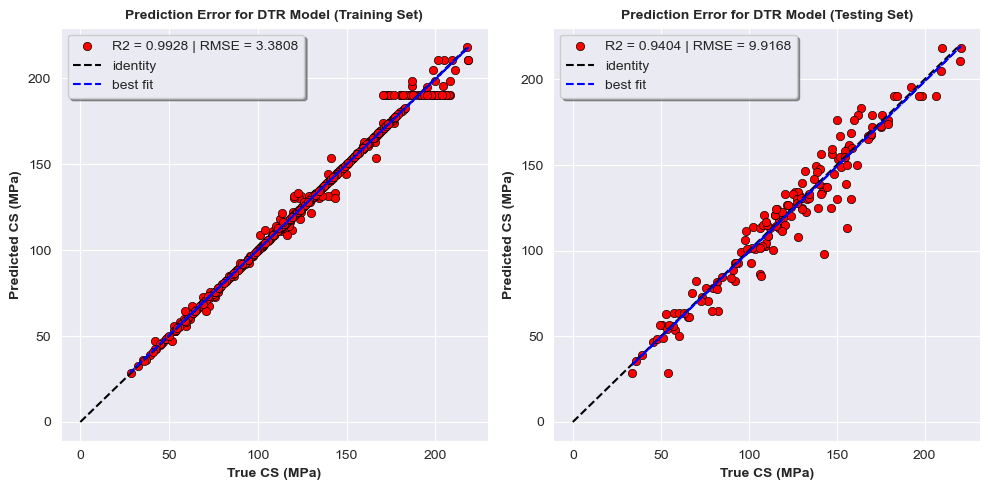

In [267]:
# create dataframe to store true and predicted compressive strength 
prediction_error_dtc_training_initial = pd.DataFrame({"True CS (MPa)": y_train, 
                                              "Predicted CS (MPa)": y_pred_train_dtc_initial})

prediction_error_dtc_testing_initial = pd.DataFrame({"True CS (MPa)": y_test, 
                                              "Predicted CS (MPa)": y_pred_test_dtc_initial})

# calculate linear regression for training and testing sets 
a_dtc_training_initial, b_dtc_training_initial = np.polyfit(prediction_error_dtc_training_initial['True CS (MPa)'], prediction_error_dtc_training_initial['Predicted CS (MPa)'], 1)
a_dtc_testing_initial, b_dtc_testing_initial = np.polyfit(prediction_error_dtc_testing_initial['True CS (MPa)'], prediction_error_dtc_testing_initial['Predicted CS (MPa)'], 1)

# adjust the figure size 
plt.figure(figsize = (10, 5))

# display the prediction error plot for training set
plt.subplot(1, 2, 1)
sns.scatterplot(x = "True CS (MPa)", 
            y = "Predicted CS (MPa)", 
            data = prediction_error_dtc_training_initial, 
            color = "red",
            edgecolor = "black", 
            label = "R2 = {:.4f} | RMSE = {:.4f}".format(r2_train_dtc_initial, rmse_train_dtc_initial))
plt.plot([0, max(y_train)], [0, max(y_train)], color = "black", linestyle = "--", label = "identity")
plt.plot(prediction_error_dtc_training_initial['True CS (MPa)'], 
         a_dtc_training_initial * prediction_error_dtc_training_initial['True CS (MPa)'] + b_dtc_training_initial, 
         color = "blue", 
         linestyle = "--", 
         label = "best fit")
plt.title("Prediction Error for DTR Model (Training Set)", fontweight = 'bold', fontsize = 10)
plt.xlabel("True CS (MPa)", fontweight = "bold", fontsize = 10)
plt.ylabel("Predicted CS (MPa)", fontweight = "bold", fontsize = 10)
plt.legend(shadow = True)

# display the prediction error plot for testing set
plt.subplot(1, 2, 2)
sns.scatterplot(x = "True CS (MPa)", 
            y = "Predicted CS (MPa)", 
            data = prediction_error_dtc_testing_initial, 
            color = "red",
            edgecolor = "black", 
            label = "R2 = {:.4f} | RMSE = {:.4f}".format(r2_test_dtc_initial, rmse_test_dtc_initial))
plt.plot([0, max(y_train)], [0, max(y_train)], color = "black", linestyle = "--", label = "identity")
plt.plot(prediction_error_dtc_testing_initial['True CS (MPa)'], 
         a_dtc_testing_initial * prediction_error_dtc_testing_initial['True CS (MPa)'] + b_dtc_testing_initial, 
         color = "blue", 
         linestyle = "--", 
         label = "best fit")
plt.title("Prediction Error for DTR Model (Testing Set)", fontweight = 'bold', fontsize = 10)
plt.xlabel("True CS (MPa)", fontweight = "bold", fontsize = 10)
plt.ylabel("Predicted CS (MPa)", fontweight = "bold", fontsize = 10)
plt.tight_layout()
plt.legend(shadow = True)
plt.show()

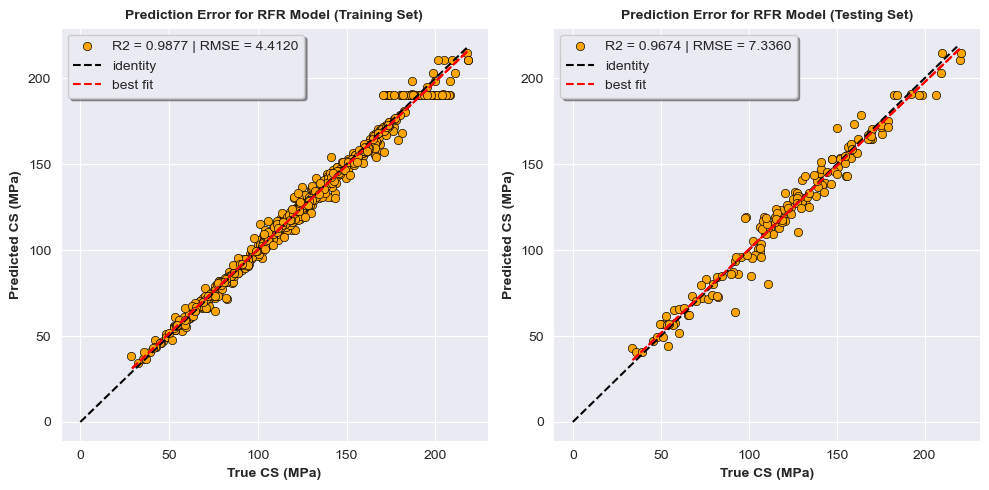

In [268]:
# create dataframe to store true and predicted compressive strength 
prediction_error_rfc_training_initial = pd.DataFrame({"True CS (MPa)": y_train, 
                                              "Predicted CS (MPa)": y_pred_train_rfc_initial})

prediction_error_rfc_testing_initial = pd.DataFrame({"True CS (MPa)": y_test, 
                                              "Predicted CS (MPa)": y_pred_test_rfc_initial})

# calculate linear regression for training and testing sets 
a_rfc_training_initial, b_rfc_training_initial = np.polyfit(prediction_error_rfc_training_initial['True CS (MPa)'], prediction_error_rfc_training_initial['Predicted CS (MPa)'], 1)
a_rfc_testing_initial, b_rfc_testing_initial = np.polyfit(prediction_error_rfc_testing_initial['True CS (MPa)'], prediction_error_rfc_testing_initial['Predicted CS (MPa)'], 1)

# adjust the figure size 
plt.figure(figsize = (10, 5))

# display the prediction error plot for training set
plt.subplot(1, 2, 1)
sns.scatterplot(x = "True CS (MPa)", 
            y = "Predicted CS (MPa)", 
            data = prediction_error_rfc_training_initial, 
            color = "orange",
            edgecolor = "black", 
            label = "R2 = {:.4f} | RMSE = {:.4f}".format(r2_train_rfc_initial, rmse_train_rfc_initial))
plt.plot([0, max(y_train)], [0, max(y_train)], color = "black", linestyle = "--", label = "identity")
plt.plot(prediction_error_rfc_training_initial['True CS (MPa)'], 
         a_rfc_training_initial * prediction_error_rfc_training_initial['True CS (MPa)'] + b_rfc_training_initial, 
         color = "red", 
         linestyle = "--", 
         label = "best fit")
plt.title("Prediction Error for RFR Model (Training Set)", fontweight = 'bold', fontsize = 10)
plt.xlabel("True CS (MPa)", fontweight = "bold", fontsize = 10)
plt.ylabel("Predicted CS (MPa)", fontweight = "bold", fontsize = 10)
plt.legend(shadow = True)

# display the prediction error plot for testing set
plt.subplot(1, 2, 2)
sns.scatterplot(x = "True CS (MPa)", 
            y = "Predicted CS (MPa)", 
            data = prediction_error_rfc_testing_initial, 
            color = "orange",
            edgecolor = "black", 
            label = "R2 = {:.4f} | RMSE = {:.4f}".format(r2_test_rfc_initial, rmse_test_rfc_initial))
plt.plot([0, max(y_train)], [0, max(y_train)], color = "black", linestyle = "--", label = "identity")
plt.plot(prediction_error_rfc_testing_initial['True CS (MPa)'], 
         a_rfc_testing_initial * prediction_error_rfc_testing_initial['True CS (MPa)'] + b_rfc_testing_initial, 
         color = "red", 
         linestyle = "--", 
         label = "best fit")
plt.title("Prediction Error for RFR Model (Testing Set)", fontweight = 'bold', fontsize = 10)
plt.xlabel("True CS (MPa)", fontweight = "bold", fontsize = 10)
plt.ylabel("Predicted CS (MPa)", fontweight = "bold", fontsize = 10)
plt.tight_layout()
plt.legend(shadow = True)
plt.show()

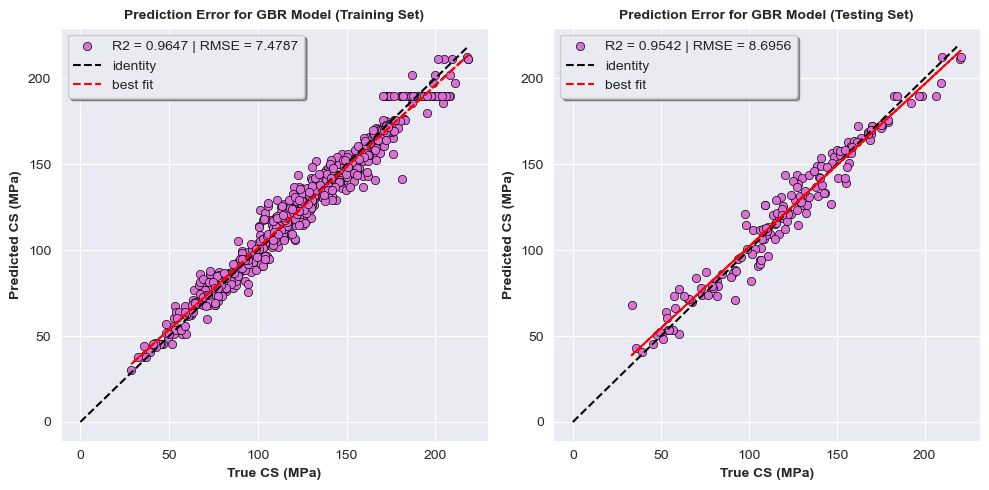

In [269]:
# create dataframe to store true and predicted compressive strength 
prediction_error_gbr_training_initial = pd.DataFrame({"True CS (MPa)": y_train, 
                                              "Predicted CS (MPa)": y_pred_train_gbr_initial})

prediction_error_gbr_testing_initial = pd.DataFrame({"True CS (MPa)": y_test, 
                                              "Predicted CS (MPa)": y_pred_test_gbr_initial})

# calculate linear regression for training and testing sets 
a_gbr_training_initial, b_gbr_training_initial = np.polyfit(prediction_error_gbr_training_initial['True CS (MPa)'], prediction_error_gbr_training_initial['Predicted CS (MPa)'], 1)
a_gbr_testing_initial, b_gbr_testing_initial = np.polyfit(prediction_error_gbr_testing_initial['True CS (MPa)'], prediction_error_gbr_testing_initial['Predicted CS (MPa)'], 1)

# adjust the figure size 
plt.figure(figsize = (10, 5))

# display the prediction error plot for training set
plt.subplot(1, 2, 1)
sns.scatterplot(x = "True CS (MPa)", 
            y = "Predicted CS (MPa)", 
            data = prediction_error_gbr_training_initial, 
            color = "orchid",
            edgecolor = "black", 
            label = "R2 = {:.4f} | RMSE = {:.4f}".format(r2_train_gbr_initial, rmse_train_gbr_initial))
plt.plot([0, max(y_train)], [0, max(y_train)], color = "black", linestyle = "--", label = "identity")
plt.plot(prediction_error_gbr_training_initial['True CS (MPa)'], 
         a_gbr_training_initial * prediction_error_gbr_training_initial['True CS (MPa)'] + b_gbr_training_initial, 
         color = "red", 
         linestyle = "--", 
         label = "best fit")
plt.title("Prediction Error for GBR Model (Training Set)", fontweight = 'bold', fontsize = 10)
plt.xlabel("True CS (MPa)", fontweight = "bold", fontsize = 10)
plt.ylabel("Predicted CS (MPa)", fontweight = "bold", fontsize = 10)
plt.legend(shadow = True)

# display the prediction error plot for testing set
plt.subplot(1, 2, 2)
sns.scatterplot(x = "True CS (MPa)", 
            y = "Predicted CS (MPa)", 
            data = prediction_error_gbr_testing_initial, 
            color = "orchid",
            edgecolor = "black", 
            label = "R2 = {:.4f} | RMSE = {:.4f}".format(r2_test_gbr_initial, rmse_test_gbr_initial))
plt.plot([0, max(y_train)], [0, max(y_train)], color = "black", linestyle = "--", label = "identity")
plt.plot(prediction_error_ada_testing_initial['True CS (MPa)'], 
         a_gbr_testing_initial * prediction_error_gbr_testing_initial['True CS (MPa)'] + b_gbr_testing_initial, 
         color = "red", 
         linestyle = "--", 
         label = "best fit")
plt.title("Prediction Error for GBR Model (Testing Set)", fontweight = 'bold', fontsize = 10)
plt.xlabel("True CS (MPa)", fontweight = "bold", fontsize = 10)
plt.ylabel("Predicted CS (MPa)", fontweight = "bold", fontsize = 10)
plt.tight_layout()
plt.legend(shadow = True)
plt.show()

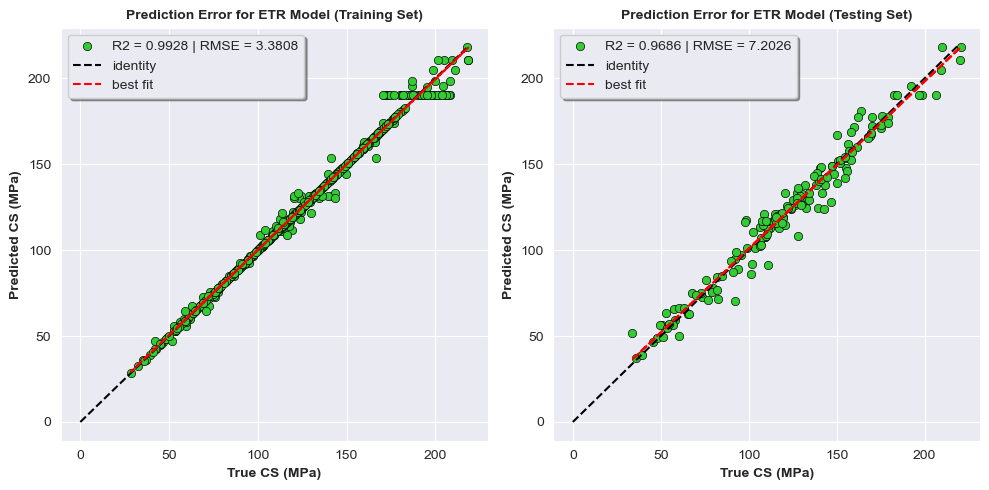

In [270]:
# create dataframe to store true and predicted compressive strength 
prediction_error_etr_training_initial = pd.DataFrame({"True CS (MPa)": y_train, 
                                              "Predicted CS (MPa)": y_pred_train_etr_initial})

prediction_error_etr_testing_initial = pd.DataFrame({"True CS (MPa)": y_test, 
                                              "Predicted CS (MPa)": y_pred_test_etr_initial})

# calculate linear regression for training and testing sets 
a_etr_training_initial, b_etr_training_initial = np.polyfit(prediction_error_etr_training_initial['True CS (MPa)'], prediction_error_etr_training_initial['Predicted CS (MPa)'], 1)
a_etr_testing_initial, b_etr_testing_initial = np.polyfit(prediction_error_etr_testing_initial['True CS (MPa)'], prediction_error_etr_testing_initial['Predicted CS (MPa)'], 1)

# adjust the figure size 
plt.figure(figsize = (10, 5))

# display the prediction error plot for training set
plt.subplot(1, 2, 1)
sns.scatterplot(x = "True CS (MPa)", 
            y = "Predicted CS (MPa)", 
            data = prediction_error_etr_training_initial, 
            color = "limegreen",
            edgecolor = "black", 
            label = "R2 = {:.4f} | RMSE = {:.4f}".format(r2_train_etr_initial, rmse_train_etr_initial))
plt.plot([0, max(y_train)], [0, max(y_train)], color = "black", linestyle = "--", label = "identity")
plt.plot(prediction_error_etr_training_initial['True CS (MPa)'], 
         a_etr_training_initial * prediction_error_etr_training_initial['True CS (MPa)'] + b_etr_training_initial, 
         color = "red", 
         linestyle = "--", 
         label = "best fit")
plt.title("Prediction Error for ETR Model (Training Set)", fontweight = 'bold', fontsize = 10)
plt.xlabel("True CS (MPa)", fontweight = "bold", fontsize = 10)
plt.ylabel("Predicted CS (MPa)", fontweight = "bold", fontsize = 10)
plt.legend(shadow = True)

# display the prediction error plot for testing set
plt.subplot(1, 2, 2)
sns.scatterplot(x = "True CS (MPa)", 
            y = "Predicted CS (MPa)", 
            data = prediction_error_etr_testing_initial, 
            color = "limegreen",
            edgecolor = "black", 
            label = "R2 = {:.4f} | RMSE = {:.4f}".format(r2_test_etr_initial, rmse_test_etr_initial))
plt.plot([0, max(y_train)], [0, max(y_train)], color = "black", linestyle = "--", label = "identity")
plt.plot(prediction_error_etr_testing_initial['True CS (MPa)'], 
         a_etr_testing_initial * prediction_error_etr_testing_initial['True CS (MPa)'] + b_etr_testing_initial, 
         color = "red", 
         linestyle = "--", 
         label = "best fit")
plt.title("Prediction Error for ETR Model (Testing Set)", fontweight = 'bold', fontsize = 10)
plt.xlabel("True CS (MPa)", fontweight = "bold", fontsize = 10)
plt.ylabel("Predicted CS (MPa)", fontweight = "bold", fontsize = 10)
plt.tight_layout()
plt.legend(shadow = True)
plt.show()

### **Feature Importances of Initial Modelling**

In [271]:
# get the names of the input parameters from the training data 
input_features_names = X_train.columns
# create a new dataframe with the scaled training data
input_features_df = pd.DataFrame(X_train_scaled, columns = input_features_names)

##### **Decision Tree Regressor**

In [272]:
# create a SHAP tree-explainer object for the intiial Decision Tree model
explainer_dtr_initial = shap.TreeExplainer(dtc_initial)
# calculate the SHAP values for the initial Decision Tree model 
shap_values_explainer_dtr_initial = explainer_dtr_initial.shap_values(input_features_df)

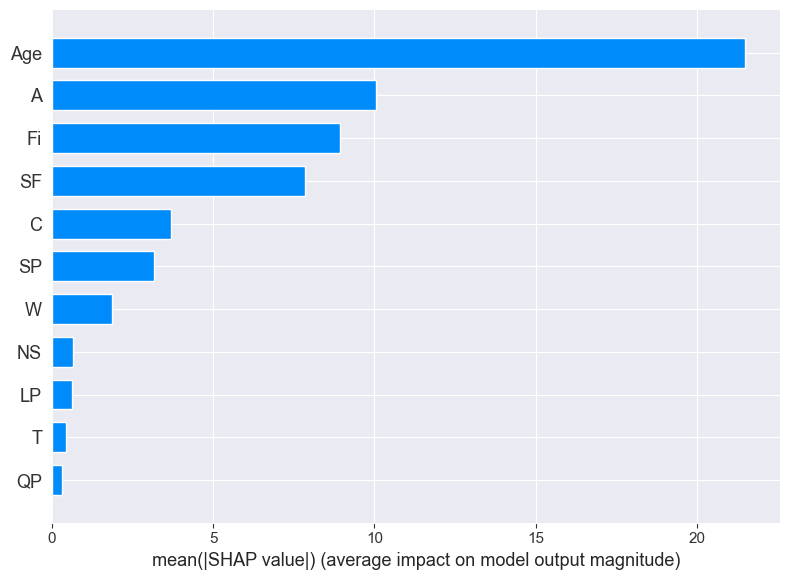

In [273]:
# visualize the feature importance based on SHAP values 
shap.summary_plot(shap_values_explainer_dtr_initial, input_features_df, plot_type = "bar")

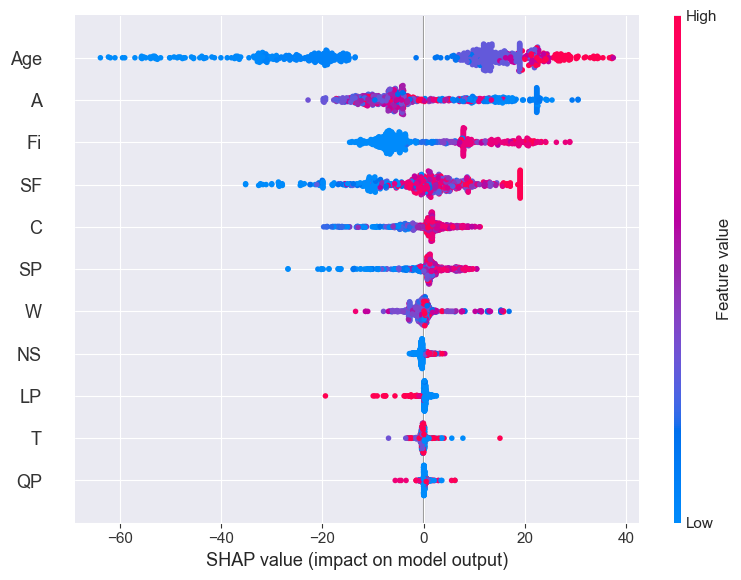

In [274]:
# visualize the feature importance based on SHAP values 
shap.summary_plot(shap_values_explainer_dtr_initial, input_features_df, plot_type = "dot")

##### **Random Forest Regressor**

In [275]:
# create a SHAP tree-explainer object for the intiial random forest model
explainer_rfc_initial = shap.TreeExplainer(rfc_initial)
# calculate the SHAP values for the initial random forest model 
shap_values_explainer_rfc_initial = explainer_rfc_initial.shap_values(input_features_df)

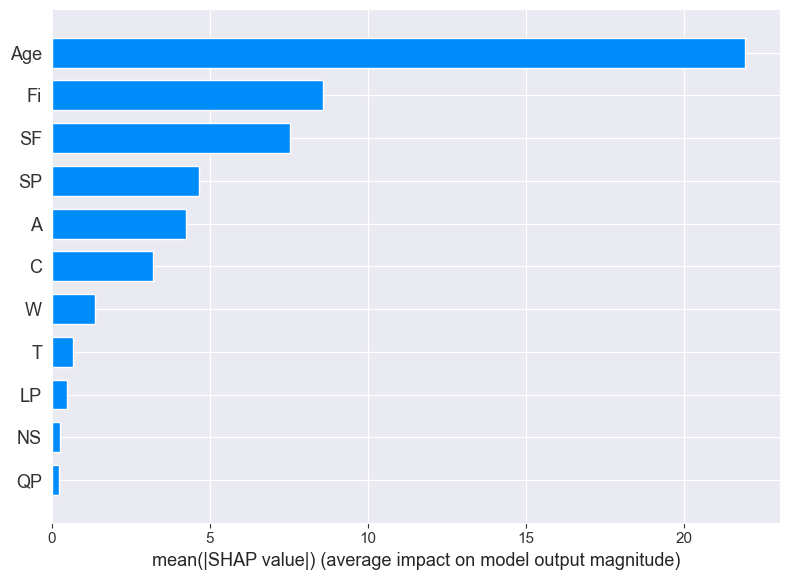

In [276]:
# visualize the feature importance based on SHAP values 
shap.summary_plot(shap_values_explainer_rfc_initial, input_features_df, plot_type = "bar")

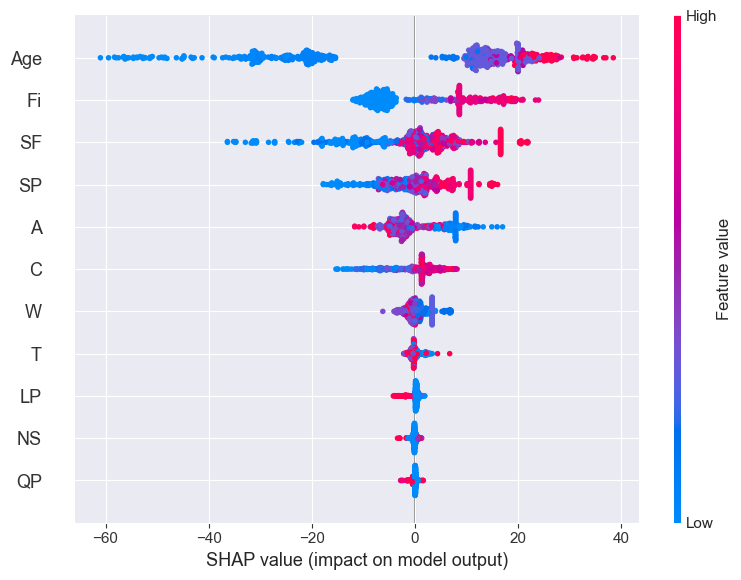

In [277]:
# visualize the feature importance based on SHAP values 
shap.summary_plot(shap_values_explainer_rfc_initial, input_features_df, plot_type = "dot")

##### **Gradient Boosting Regressor**

In [278]:
# create a SHAP tree-explainer object for the intiial gradient boosting regressor model
explainer_gbr_initial = shap.TreeExplainer(gbr_initial)
# calculate the SHAP values for the initial random forest model 
shap_values_explainer_gbr_initial = explainer_gbr_initial.shap_values(input_features_df)

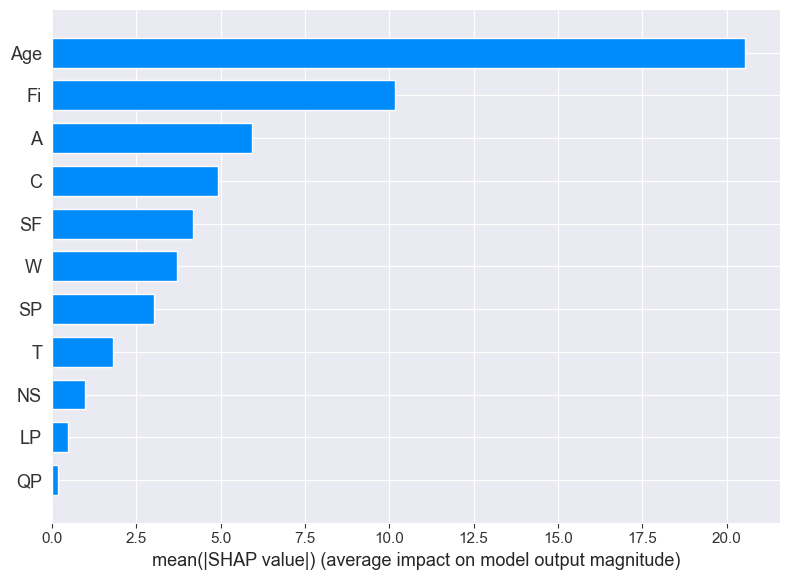

In [279]:
# visualize the feature importance based on SHAP values 
shap.summary_plot(shap_values_explainer_gbr_initial, input_features_df, plot_type = "bar")

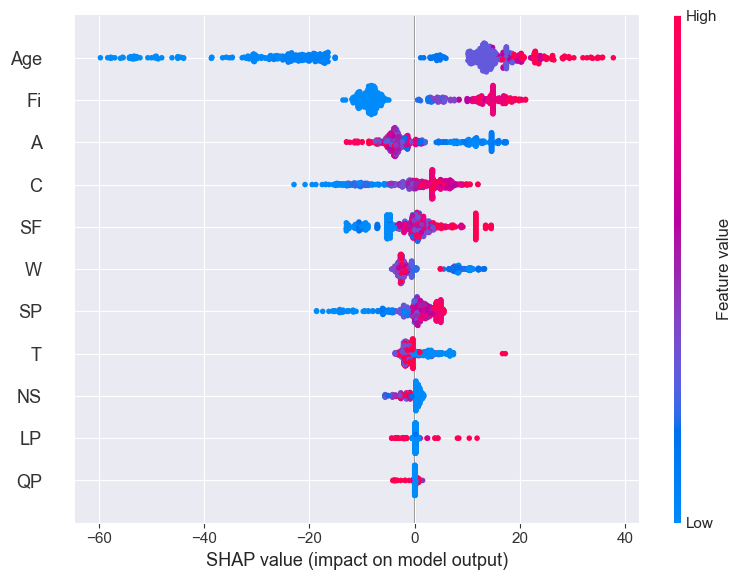

In [280]:
# visualize the feature importance based on SHAP values 
shap.summary_plot(shap_values_explainer_gbr_initial, input_features_df, plot_type = "dot")

##### **Extra Trees Regressor**

In [281]:
# create a SHAP tree-explainer object for the intiial extra trees regressor model
explainer_etr_initial = shap.TreeExplainer(etr_initial)
# calculate the SHAP values for the initial random forest model 
shap_values_explainer_etr_initial = explainer_etr_initial.shap_values(input_features_df)

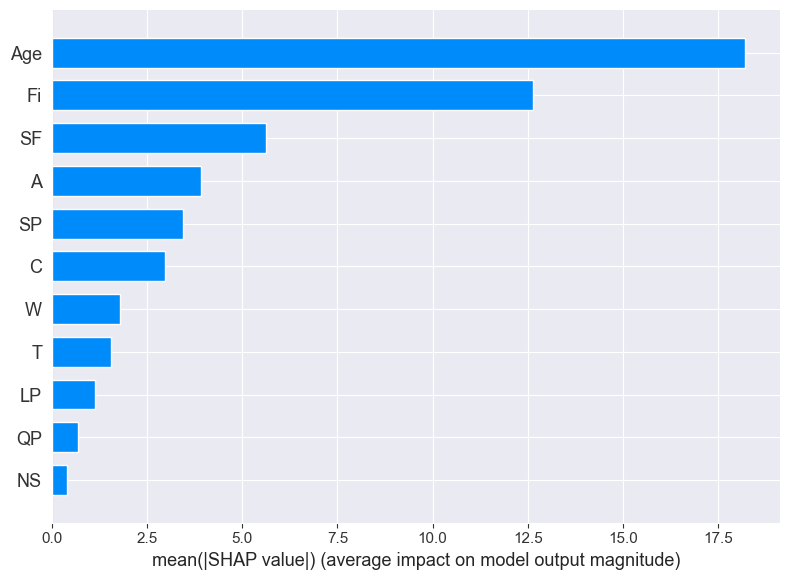

In [282]:
# visualize the feature importance based on SHAP values 
shap.summary_plot(shap_values_explainer_etr_initial, input_features_df, plot_type = "bar")

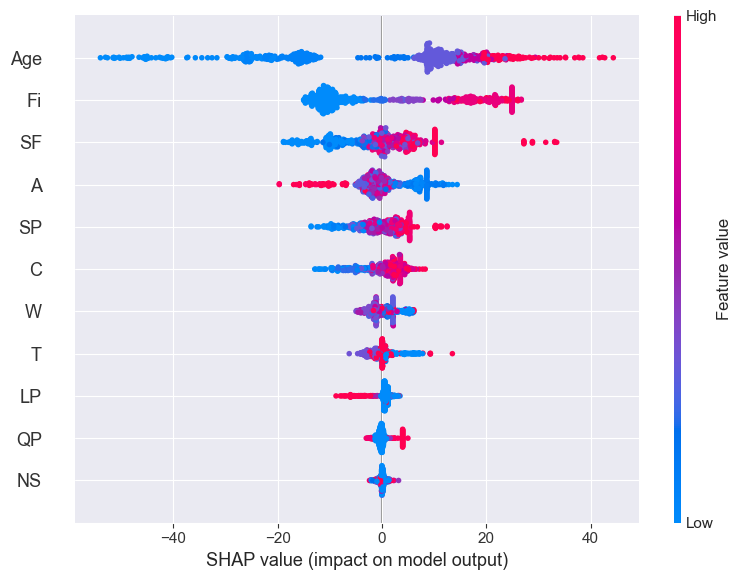

In [283]:
# visualize the feature importance based on SHAP values 
shap.summary_plot(shap_values_explainer_etr_initial, input_features_df, plot_type = "dot")

## **Random Search (RS) Optimised Modelling**

In [284]:
# define a custom RMSE scoring function 
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

In [285]:
# create make-scorer for rmse
make_scorer_rmse = make_scorer(rmse, greater_is_better = False)

In [286]:
# define k-fold 
kFold_ops = KFold(10, shuffle = True, random_state = 42)

### **Decision Tree Regressor**

In [287]:
# define the parameter grid 
dtr_ops_params = {'max_depth': np.arange(1, 10), 
          'min_samples_split': np.arange(2, 5), 
          'min_samples_leaf': np.arange(2, 5)}

# create an optimised decision tree regressor object
dtr_ops = RandomizedSearchCV(DecisionTreeRegressor(random_state = 42), 
                             param_distributions = dtr_ops_params, 
                             cv = kFold_ops, 
                             random_state = 42, 
                             n_iter = 100,
                             scoring = make_scorer_rmse,
                             n_jobs = -1,
                             return_train_score = True, 
                             verbose = 3)
# fit the model to the training data 
dtr_ops.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 81 candidates, totalling 810 fits
[CV 2/10] END max_depth=1, min_samples_leaf=2, min_samples_split=2;, score=(train=-29.183, test=-35.149) total time=   0.0s
[CV 1/10] END max_depth=1, min_samples_leaf=2, min_samples_split=2;, score=(train=-29.852, test=-29.751) total time=   0.0s
[CV 9/10] END max_depth=1, min_samples_leaf=2, min_samples_split=2;, score=(train=-29.957, test=-28.814) total time=   0.0s
[CV 10/10] END max_depth=1, min_samples_leaf=2, min_samples_split=2;, score=(train=-29.861, test=-29.708) total time=   0.0s
[CV 4/10] END max_depth=1, min_samples_leaf=2, min_samples_split=2;, score=(train=-30.080, test=-27.586) total time=   0.0s
[CV 1/10] END max_depth=1, min_samples_leaf=2, min_samples_split=3;, score=(train=-29.852, test=-29.751) total time=   0.0s
[CV 2/10] END max_depth=1, min_samples_leaf=2, min_samples_split=3;, score=(train=-29.183, test=-35.149) total time=   0.0s
[CV 3/10] END max_depth=1, min_samples_leaf=2, min_samples_split=3;,

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
                   estimator=DecisionTreeRegressor(random_state=42), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([2, 3, 4]),
                                        'min_samples_split': array([2, 3, 4])},
                   random_state=42, return_train_score=True,
                   scoring=make_scorer(rmse, greater_is_better=False),
                   verbose=3)

In [288]:
# display the best hyperparameters and best RMSE score for optimized decision tree regressor
print("The best hyperparameters for Decision Tree Regressor is {}".format(dtr_ops.best_params_))
print("The best RMSE score for Decision Tree Regressor hyperparameters is {:.4f}".format(-dtr_ops.best_score_))

The best hyperparameters for Decision Tree Regressor is {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 9}
The best RMSE score for Decision Tree Regressor hyperparameters is 11.0495


In [289]:
# predict on the training set 
y_pred_train_dtr_ops = dtr_ops.predict(X_train_scaled)
# predict on the testing set
y_pred_test_dtr_ops = dtr_ops.predict(X_test_scaled)

In [290]:
# calculate evaluation metrics for the optimised decision tree model on the training set
r2_train_dtr_ops = r2_score(y_train, y_pred_train_dtr_ops)
mae_train_dtr_ops = mean_absolute_error(y_train, y_pred_train_dtr_ops)
mse_train_dtr_ops = mean_squared_error(y_train, y_pred_train_dtr_ops)
rmse_train_dtr_ops = np.sqrt(mean_squared_error(y_train, y_pred_train_dtr_ops))
rmsle_train_dtr_ops = np.sqrt(mean_squared_log_error(y_train, y_pred_train_dtr_ops))
mape_train_dtr_ops = mean_absolute_percentage_error(y_train, y_pred_train_dtr_ops)

# calculate evaluation metrics for the optimized decision tree model on the testing set 
r2_test_dtr_ops = r2_score(y_test, y_pred_test_dtr_ops)
mae_test_dtr_ops = mean_absolute_error(y_test, y_pred_test_dtr_ops)
mse_test_dtr_ops = mean_squared_error(y_test, y_pred_test_dtr_ops)
rmse_test_dtr_ops = np.sqrt(mean_squared_error(y_test, y_pred_test_dtr_ops))
rmsle_test_dtr_ops = np.sqrt(mean_squared_log_error(y_test, y_pred_test_dtr_ops))
mape_test_dtr_ops = mean_absolute_percentage_error(y_test, y_pred_test_dtr_ops)


print("Training Set: ")
print("=============================")
print("R2: {:.4f}".format(r2_train_dtr_ops))
print("MAE: {:.4f}".format(mae_train_dtr_ops))
print("MSE: {:.4f}".format(mse_train_dtr_ops))
print("RMSE: {:.4f}".format(rmse_train_dtr_ops))
print("RMSLE: {:.4f}".format(rmsle_train_dtr_ops))
print("MAPE: {:.4f}".format(mape_train_dtr_ops))
print()

print("Testing Set: ")
print("=============================")
print("R2: {:.4f}".format(r2_test_dtr_ops))
print("MAE: {:.4f}".format(mae_test_dtr_ops))
print("MSE: {:.4f}".format(mse_test_dtr_ops))
print("RMSE: {:.4f}".format(rmse_test_dtr_ops))
print("RMSLE: {:.4f}".format(rmsle_test_dtr_ops))
print("MAPE: {:.4f}".format(mape_test_dtr_ops))

Training Set: 
R2: 0.9769
MAE: 4.2534
MSE: 36.5939
RMSE: 6.0493
RMSLE: 0.0493
MAPE: 0.0364

Testing Set: 
R2: 0.9177
MAE: 8.0402
MSE: 135.6833
RMSE: 11.6483
RMSLE: 0.1039
MAPE: 0.0697


### **Random Forest Regressor**

In [291]:
# define the parameter grid 
rfr_ops_params = {'n_estimators': np.arange(50, 300, 10),
                    'max_depth': np.arange(1, 10), 
                    'min_samples_split': np.arange(2, 5), 
                    'min_samples_leaf': np.arange(2, 5)}

# create an optimized random forest regressor object
rfr_ops = RandomizedSearchCV(RandomForestRegressor(random_state = 42), 
                             param_distributions = rfr_ops_params, 
                             cv = kFold_ops, 
                             random_state = 42, 
                             n_iter = 100,
                             scoring = make_scorer_rmse,
                             n_jobs = -1,
                             return_train_score = True, 
                             verbose = 3)
# fit the model to the training data 
rfr_ops.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV 6/10] END max_depth=9, min_samples_leaf=4, min_samples_split=2, n_estimators=250;, score=(train=-7.567, test=-9.877) total time=   0.3s
[CV 3/10] END max_depth=9, min_samples_leaf=4, min_samples_split=2, n_estimators=250;, score=(train=-7.479, test=-11.252) total time=   0.4s
[CV 5/10] END max_depth=9, min_samples_leaf=4, min_samples_split=2, n_estimators=250;, score=(train=-7.499, test=-10.165) total time=   0.4s
[CV 2/10] END max_depth=9, min_samples_leaf=4, min_samples_split=2, n_estimators=250;, score=(train=-7.748, test=-10.093) total time=   0.4s
[CV 4/10] END max_depth=9, min_samples_leaf=4, min_samples_split=2, n_estimators=250;, score=(train=-7.498, test=-8.899) total time=   0.4s
[CV 7/10] END max_depth=9, min_samples_leaf=4, min_samples_split=2, n_estimators=250;, score=(train=-7.730, test=-8.421) total time=   0.4s
[CV 1/10] END max_depth=9, min_samples_leaf=4, min_samples_split=2, n_estimators=250;, score

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
                   estimator=RandomForestRegressor(random_state=42), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([2, 3, 4]),
                                        'min_samples_split': array([2, 3, 4]),
                                        'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160, 170,
       180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290])},
                   random_state=42, return_train_score=True,
                   scoring=make_scorer(rmse, greater_is_better=False),
                   verbose=3)

In [292]:
# display the best hyperparameters and best RMSE score for optimized random forest regressor
print("The best hyperparameters for Random Forest Regressor is {}".format(rfr_ops.best_params_))
print("The best RMSE score for Random Forest Regressor hyperparameters is {:.4f}".format(-rfr_ops.best_score_))

The best hyperparameters for Random Forest Regressor is {'n_estimators': 260, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_depth': 9}
The best RMSE score for Random Forest Regressor hyperparameters is 9.5331


In [293]:
# predict on the training set 
y_pred_train_rfr_ops = rfr_ops.predict(X_train_scaled)
# predict on the testing set
y_pred_test_rfr_ops = rfr_ops.predict(X_test_scaled)

In [294]:
# calculate evaluation metrics for the optimized random forest model on the training set
r2_train_rfr_ops = r2_score(y_train, y_pred_train_rfr_ops)
mae_train_rfr_ops = mean_absolute_error(y_train, y_pred_train_rfr_ops)
mse_train_rfr_ops = mean_squared_error(y_train, y_pred_train_rfr_ops)
rmse_train_rfr_ops = np.sqrt(mean_squared_error(y_train, y_pred_train_rfr_ops))
rmsle_train_rfr_ops = np.sqrt(mean_squared_log_error(y_train, y_pred_train_rfr_ops))
mape_train_rfr_ops = mean_absolute_percentage_error(y_train, y_pred_train_rfr_ops)

# calculate evaluation metrics for the optimized random forest model on the testing set 
r2_test_rfr_ops = r2_score(y_test, y_pred_test_rfr_ops)
mae_test_rfr_ops = mean_absolute_error(y_test, y_pred_test_rfr_ops)
mse_test_rfr_ops = mean_squared_error(y_test, y_pred_test_rfr_ops)
rmse_test_rfr_ops = np.sqrt(mean_squared_error(y_test, y_pred_test_rfr_ops))
rmsle_test_rfr_ops = np.sqrt(mean_squared_log_error(y_test, y_pred_test_rfr_ops))
mape_test_rfr_ops = mean_absolute_percentage_error(y_test, y_pred_test_rfr_ops)


print("Training Set: ")
print("=============================")
print("R2: {:.4f}".format(r2_train_rfr_ops))
print("MAE: {:.4f}".format(mae_train_rfr_ops))
print("MSE: {:.4f}".format(mse_train_rfr_ops))
print("RMSE: {:.4f}".format(rmse_train_rfr_ops))
print("RMSLE: {:.4f}".format(rmsle_train_rfr_ops))
print("MAPE: {:.4f}".format(mape_train_rfr_ops))
print()

print("Testing Set: ")
print("=============================")
print("R2: {:.4f}".format(r2_test_rfr_ops))
print("MAE: {:.4f}".format(mae_test_rfr_ops))
print("MSE: {:.4f}".format(mse_test_rfr_ops))
print("RMSE: {:.4f}".format(rmse_test_rfr_ops))
print("RMSLE: {:.4f}".format(rmsle_test_rfr_ops))
print("MAPE: {:.4f}".format(mape_test_rfr_ops))

Training Set: 
R2: 0.9772
MAE: 4.3700
MSE: 36.1737
RMSE: 6.0145
RMSLE: 0.0522
MAPE: 0.0382

Testing Set: 
R2: 0.9572
MAE: 6.3001
MSE: 70.5295
RMSE: 8.3982
RMSLE: 0.0836
MAPE: 0.0592


### **Gradient Boosting Regressor**

In [295]:
# define the parameter grid 
gbr_ops_params = {'n_estimators': np.arange(50, 300, 10),
                  'learning_rate':[0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 3, 4, 5],
                    'max_depth': np.arange(1, 10), 
                    'min_samples_split': np.arange(2, 5), 
                    'min_samples_leaf': np.arange(2, 5)}

# create an optimized gradient boosting regressor object
gbr_ops = RandomizedSearchCV(GradientBoostingRegressor(random_state = 42), 
                             param_distributions = gbr_ops_params, 
                             cv = kFold_ops, 
                             random_state = 42, 
                             n_iter = 100, 
                             scoring = make_scorer_rmse,
                             n_jobs = -1,
                             return_train_score = True, 
                             verbose = 3)
# fit the model to the training data 
gbr_ops.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV 2/10] END learning_rate=2, max_depth=7, min_samples_leaf=2, min_samples_split=3, n_estimators=90;, score=(train=-39.273, test=-139.405) total time=   0.1s
[CV 1/10] END learning_rate=2, max_depth=7, min_samples_leaf=2, min_samples_split=3, n_estimators=90;, score=(train=-40.014, test=-38.515) total time=   0.1s
[CV 5/10] END learning_rate=2, max_depth=7, min_samples_leaf=2, min_samples_split=3, n_estimators=90;, score=(train=-40.116, test=-40.304) total time=   0.1s
[CV 4/10] END learning_rate=2, max_depth=7, min_samples_leaf=2, min_samples_split=3, n_estimators=90;, score=(train=-40.034, test=-43.568) total time=   0.1s
[CV 3/10] END learning_rate=2, max_depth=7, min_samples_leaf=2, min_samples_split=3, n_estimators=90;, score=(train=-39.831, test=-42.042) total time=   0.1s
[CV 7/10] END learning_rate=2, max_depth=7, min_samples_leaf=2, min_samples_split=3, n_estimators=90;, score=(train=-39.358, test=-51.172) total

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
                   estimator=GradientBoostingRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.02, 0.03,
                                                          0.04, 0.05, 0.1, 0.2,
                                                          0.3, 0.4, 0.5, 1, 2,
                                                          3, 4, 5],
                                        'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([2, 3, 4]),
                                        'min_samples_split': array([2, 3, 4]),
                                        'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160, 170,
       180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290])},
                   random_state=42, return_train_score=True,
                   scoring=make_scorer(rmse, greater_is_better=False),
                   verbose=3)

In [296]:
# display the best hyperparameters and best RMSE score for optimized gradient boosting regressor
print("The best hyperparameters for Gradient Boosting Regressor is {}".format(gbr_ops.best_params_))
print("The best RMSE score for Gradient Boosting Regressor hyperparameters is {:.4f}".format(-gbr_ops.best_score_))

The best hyperparameters for Gradient Boosting Regressor is {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 4, 'learning_rate': 0.2}
The best RMSE score for Gradient Boosting Regressor hyperparameters is 7.9958


In [297]:
# predict on the training set 
y_pred_train_gbr_ops = gbr_ops.predict(X_train_scaled)
# predict on the testing set
y_pred_test_gbr_ops = gbr_ops.predict(X_test_scaled)

In [298]:
# calculate evaluation metrics for the optimized gradient boosting regressor model on the training set
r2_train_gbr_ops = r2_score(y_train, y_pred_train_gbr_ops)
mae_train_gbr_ops = mean_absolute_error(y_train, y_pred_train_gbr_ops)
mse_train_gbr_ops = mean_squared_error(y_train, y_pred_train_gbr_ops)
rmse_train_gbr_ops = np.sqrt(mean_squared_error(y_train, y_pred_train_gbr_ops))
rmsle_train_gbr_ops = np.sqrt(mean_squared_log_error(y_train, y_pred_train_gbr_ops))
mape_train_gbr_ops = mean_absolute_percentage_error(y_train, y_pred_train_gbr_ops)

# calculate evaluation metrics for the optimized gradient boosting regressor model on the testing set 
r2_test_gbr_ops = r2_score(y_test, y_pred_test_gbr_ops)
mae_test_gbr_ops = mean_absolute_error(y_test, y_pred_test_gbr_ops)
mse_test_gbr_ops = mean_squared_error(y_test, y_pred_test_gbr_ops)
rmse_test_gbr_ops = np.sqrt(mean_squared_error(y_test, y_pred_test_gbr_ops))
rmsle_test_gbr_ops = np.sqrt(mean_squared_log_error(y_test, y_pred_test_gbr_ops))
mape_test_gbr_ops = mean_absolute_percentage_error(y_test, y_pred_test_gbr_ops)


print("Training Set: ")
print("=============================")
print("R2: {:.4f}".format(r2_train_gbr_ops))
print("MAE: {:.4f}".format(mae_train_gbr_ops))
print("MSE: {:.4f}".format(mse_train_gbr_ops))
print("RMSE: {:.4f}".format(rmse_train_gbr_ops))
print("RMSLE: {:.4f}".format(rmsle_train_gbr_ops))
print("MAPE: {:.4f}".format(mape_train_gbr_ops))
print()

print("Testing Set: ")
print("=============================")
print("R2: {:.4f}".format(r2_test_gbr_ops))
print("MAE: {:.4f}".format(mae_test_gbr_ops))
print("MSE: {:.4f}".format(mse_test_gbr_ops))
print("RMSE: {:.4f}".format(rmse_test_gbr_ops))
print("RMSLE: {:.4f}".format(rmsle_test_gbr_ops))
print("MAPE: {:.4f}".format(mape_test_gbr_ops))

Training Set: 
R2: 0.9890
MAE: 2.6499
MSE: 17.3827
RMSE: 4.1693
RMSLE: 0.0310
MAPE: 0.0218

Testing Set: 
R2: 0.9684
MAE: 5.0742
MSE: 52.1494
RMSE: 7.2215
RMSLE: 0.0743
MAPE: 0.0482


### **Extra Trees Regressor**

In [299]:
# define the parameter grid 
etr_ops_params = {'n_estimators': np.arange(50, 300, 10),
                    'max_depth': np.arange(1, 10), 
                    'min_samples_split': np.arange(2, 5), 
                    'min_samples_leaf': np.arange(2, 5)}

# create an initial extra trees regressor object
etr_ops = RandomizedSearchCV(ExtraTreesRegressor(random_state = 42), 
                             param_distributions = etr_ops_params, 
                             cv = kFold_ops, 
                             random_state = 42, 
                             scoring = make_scorer_rmse,
                             n_iter = 100, 
                             n_jobs = -1,
                             return_train_score = True, 
                             verbose = 3)
# fit the model to the training data 
etr_ops.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV 1/10] END max_depth=9, min_samples_leaf=4, min_samples_split=2, n_estimators=250;, score=(train=-8.244, test=-12.555) total time=   0.2s
[CV 3/10] END max_depth=9, min_samples_leaf=4, min_samples_split=2, n_estimators=250;, score=(train=-8.326, test=-12.010) total time=   0.2s
[CV 5/10] END max_depth=9, min_samples_leaf=4, min_samples_split=2, n_estimators=250;, score=(train=-8.343, test=-10.050) total time=   0.2s
[CV 6/10] END max_depth=9, min_samples_leaf=4, min_samples_split=2, n_estimators=250;, score=(train=-8.467, test=-9.685) total time=   0.2s
[CV 2/10] END max_depth=9, min_samples_leaf=4, min_samples_split=2, n_estimators=250;, score=(train=-8.596, test=-9.145) total time=   0.2s
[CV 4/10] END max_depth=9, min_samples_leaf=4, min_samples_split=2, n_estimators=250;, score=(train=-8.462, test=-9.665) total time=   0.2s[CV 7/10] END max_depth=9, min_samples_leaf=4, min_samples_split=2, n_estimators=250;, score=

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
                   estimator=ExtraTreesRegressor(random_state=42), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([2, 3, 4]),
                                        'min_samples_split': array([2, 3, 4]),
                                        'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160, 170,
       180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290])},
                   random_state=42, return_train_score=True,
                   scoring=make_scorer(rmse, greater_is_better=False),
                   verbose=3)

In [300]:
# display the best hyperparameters and best RMSE score for optimized extra trees regressor
print("The best hyperparameters for Extra Trees Regressor is {}".format(etr_ops.best_params_))
print("The best RMSE score for Extra Trees Regressor hyperparameters is {:.4f}".format(-etr_ops.best_score_))

The best hyperparameters for Extra Trees Regressor is {'n_estimators': 260, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_depth': 9}
The best RMSE score for Extra Trees Regressor hyperparameters is 9.8324


In [301]:
# predict on the training set 
y_pred_train_etr_ops = etr_ops.predict(X_train_scaled)
# predict on the testing set
y_pred_test_etr_ops = etr_ops.predict(X_test_scaled)

In [302]:
# calculate evaluation metrics for the optimized extra trees regressor model on the training set
r2_train_etr_ops = r2_score(y_train, y_pred_train_etr_ops)
mae_train_etr_ops = mean_absolute_error(y_train, y_pred_train_etr_ops)
mse_train_etr_ops = mean_squared_error(y_train, y_pred_train_etr_ops)
rmse_train_etr_ops = np.sqrt(mean_squared_error(y_train, y_pred_train_etr_ops))
rmsle_train_etr_ops = np.sqrt(mean_squared_log_error(y_train, y_pred_train_etr_ops))
mape_train_etr_ops = mean_absolute_percentage_error(y_train, y_pred_train_etr_ops)

# calculate evaluation metrics for the optimized extra trees regressor model on the testing set 
r2_test_etr_ops = r2_score(y_test, y_pred_test_etr_ops)
mae_test_etr_ops = mean_absolute_error(y_test, y_pred_test_etr_ops)
mse_test_etr_ops = mean_squared_error(y_test, y_pred_test_etr_ops)
rmse_test_etr_ops = np.sqrt(mean_squared_error(y_test, y_pred_test_etr_ops))
rmsle_test_etr_ops = np.sqrt(mean_squared_log_error(y_test, y_pred_test_etr_ops))
mape_test_etr_ops = mean_absolute_percentage_error(y_test, y_pred_test_etr_ops)

print("Training Set: ")
print("=============================")
print("R2: {:.4f}".format(r2_train_etr_ops))
print("MAE: {:.4f}".format(mae_train_etr_ops))
print("MSE: {:.4f}".format(mse_train_etr_ops))
print("RMSE: {:.4f}".format(rmse_train_etr_ops))
print("RMSLE: {:.4f}".format(rmsle_train_etr_ops))
print("MAPE: {:.4f}".format(mape_train_etr_ops))
print()

print("Testing Set: ")
print("=============================")
print("R2: {:.4f}".format(r2_test_etr_ops))
print("MAE: {:.4f}".format(mae_test_etr_ops))
print("MSE: {:.4f}".format(mse_test_etr_ops))
print("RMSE: {:.4f}".format(rmse_test_etr_ops))
print("RMSLE: {:.4f}".format(rmsle_test_etr_ops))
print("MAPE: {:.4f}".format(mape_test_etr_ops))

Training Set: 
R2: 0.9681
MAE: 5.0409
MSE: 50.5891
RMSE: 7.1126
RMSLE: 0.0661
MAPE: 0.0462

Testing Set: 
R2: 0.9546
MAE: 6.4810
MSE: 74.9169
RMSE: 8.6555
RMSLE: 0.0946
MAPE: 0.0651


### **Summary of Random Search Optimised Modelling**

In [303]:
# create lists of optimized model performance metrics 
r2_train_ops = [r2_train_dtr_ops, r2_train_rfr_ops, r2_train_gbr_ops, r2_train_etr_ops]
mae_train_ops = [mae_train_dtr_ops, mae_train_rfr_ops, mae_train_gbr_ops, mae_train_etr_ops]
mse_train_ops = [mse_train_dtr_ops, mse_train_rfr_ops, mse_train_gbr_ops, mse_train_etr_ops]
rmse_train_ops = [rmse_train_dtr_ops, rmse_train_rfr_ops, rmse_train_gbr_ops, rmse_train_etr_ops]
rmsle_train_ops = [rmsle_train_dtr_ops, rmsle_train_rfr_ops, rmsle_train_gbr_ops, rmsle_train_etr_ops]
mape_train_ops = [mape_train_dtr_ops, mape_train_rfr_ops, mape_train_gbr_ops, mape_train_etr_ops]

r2_test_ops = [r2_test_dtr_ops, r2_test_rfr_ops, r2_test_gbr_ops, r2_test_etr_ops]
mae_test_ops = [mae_test_dtr_ops, mae_test_rfr_ops, mae_test_gbr_ops, mae_test_etr_ops]
mse_test_ops = [mse_test_dtr_ops, mse_test_rfr_ops, mse_test_gbr_ops, mse_test_etr_ops]
rmse_test_ops = [rmse_test_dtr_ops, rmse_test_rfr_ops, rmse_test_gbr_ops, rmse_test_etr_ops]
rmsle_test_ops = [rmsle_test_dtr_ops, rmsle_test_rfr_ops, rmsle_test_gbr_ops, rmsle_test_etr_ops]
mape_test_ops = [mape_test_dtr_ops, mape_test_rfr_ops, mape_test_gbr_ops, mape_test_etr_ops]

# create dataframe to store optimized model performance 
model_name = ['DTR', 'RFR', 'GBR', 'ETR']

ops_modelling_trainining = pd.DataFrame({'Model': model_name,
                                  'R2': r2_train_ops, 
                                  'MAE': mae_train_ops, 
                                  'MSE': mse_train_ops, 
                                  'RMSE': rmse_train_ops, 
                                  'RMSLE': rmsle_train_ops, 
                                  'MAPE': mape_train_ops})

ops_modelling_testing = pd.DataFrame({'Model': model_name,
                                  'R2': r2_test_ops, 
                                  'MAE': mae_test_ops, 
                                  'MSE': mse_test_ops, 
                                  'RMSE': rmse_test_ops, 
                                  'RMSLE': rmsle_test_ops, 
                                  'MAPE': mape_test_ops})

# display results 
print("Training Set:")
print("=========================================================================")
print(ops_modelling_trainining)
print()
print("Testing Set:")
print("=========================================================================")
print(ops_modelling_testing)

Training Set:
  Model        R2       MAE        MSE      RMSE     RMSLE      MAPE
0   DTR  0.976929  4.253396  36.593921  6.049291  0.049321  0.036441
1   RFR  0.977194  4.370014  36.173675  6.014456  0.052205  0.038196
2   GBR  0.989041  2.649902  17.382720  4.169259  0.031021  0.021807
3   ETR  0.968106  5.040888  50.589128  7.112603  0.066072  0.046183

Testing Set:
  Model        R2       MAE         MSE       RMSE     RMSLE      MAPE
0   DTR  0.917749  8.040248  135.683302  11.648318  0.103910  0.069731
1   RFR  0.957245  6.300082   70.529483   8.398183  0.083640  0.059249
2   GBR  0.968387  5.074168   52.149391   7.221454  0.074319  0.048195
3   ETR  0.954585  6.480952   74.916925   8.655456  0.094609  0.065146


### **Prediction Error for Optimised Modelling**

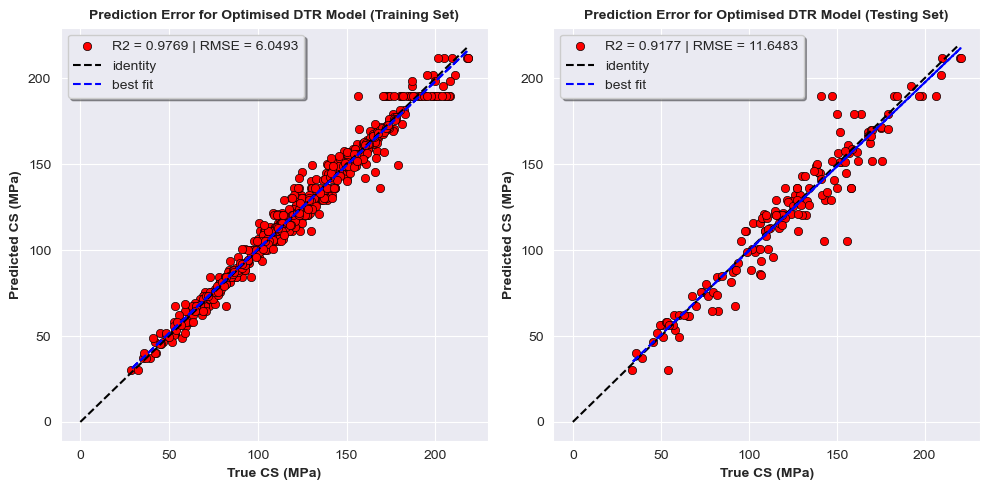

In [304]:
# create dataframe to store true and predicted compressive strength 
prediction_error_dtr_training_ops = pd.DataFrame({"True CS (MPa)": y_train, 
                                              "Predicted CS (MPa)": y_pred_train_dtr_ops})

prediction_error_dtr_testing_ops = pd.DataFrame({"True CS (MPa)": y_test, 
                                              "Predicted CS (MPa)": y_pred_test_dtr_ops})

# calculate linear regression for training and testing sets 
a_dtr_training_ops, b_dtr_training_ops = np.polyfit(prediction_error_dtr_training_ops['True CS (MPa)'], prediction_error_dtr_training_ops['Predicted CS (MPa)'], 1)
a_dtr_testing_ops, b_dtr_testing_ops = np.polyfit(prediction_error_dtr_testing_ops['True CS (MPa)'], prediction_error_dtr_testing_ops['Predicted CS (MPa)'], 1)

# adjust the figure size 
plt.figure(figsize = (10, 5))

# display the prediction error plot for training set
plt.subplot(1, 2, 1)
sns.scatterplot(x = "True CS (MPa)", 
            y = "Predicted CS (MPa)", 
            data = prediction_error_dtr_training_ops, 
            color = "red",
            edgecolor = "black", 
            label = "R2 = {:.4f} | RMSE = {:.4f}".format(r2_train_dtr_ops, rmse_train_dtr_ops))
plt.plot([0, max(y_train)], [0, max(y_train)], color = "black", linestyle = "--", label = "identity")
plt.plot(prediction_error_dtr_training_ops['True CS (MPa)'], 
         a_dtr_training_ops * prediction_error_dtr_training_ops['True CS (MPa)'] + b_dtr_training_ops, 
         color = "blue", 
         linestyle = "--", 
         label = "best fit")
plt.title("Prediction Error for Optimised DTR Model (Training Set)", fontweight = 'bold', fontsize = 10)
plt.xlabel("True CS (MPa)", fontweight = "bold", fontsize = 10)
plt.ylabel("Predicted CS (MPa)", fontweight = "bold", fontsize = 10)
plt.legend(shadow = True)

# display the prediction error plot for testing set
plt.subplot(1, 2, 2)
sns.scatterplot(x = "True CS (MPa)", 
            y = "Predicted CS (MPa)", 
            data = prediction_error_dtr_testing_ops, 
            color = "red",
            edgecolor = "black", 
            label = "R2 = {:.4f} | RMSE = {:.4f}".format(r2_test_dtr_ops, rmse_test_dtr_ops))
plt.plot([0, max(y_train)], [0, max(y_train)], color = "black", linestyle = "--", label = "identity")
plt.plot(prediction_error_dtr_testing_ops['True CS (MPa)'], 
         a_dtr_testing_ops * prediction_error_dtr_testing_ops['True CS (MPa)'] + b_dtr_testing_ops, 
         color = "blue", 
         linestyle = "--", 
         label = "best fit")
plt.title("Prediction Error for Optimised DTR Model (Testing Set)", fontweight = 'bold', fontsize = 10)
plt.xlabel("True CS (MPa)", fontweight = "bold", fontsize = 10)
plt.ylabel("Predicted CS (MPa)", fontweight = "bold", fontsize = 10)
plt.tight_layout()
plt.legend(shadow = True)
plt.show()

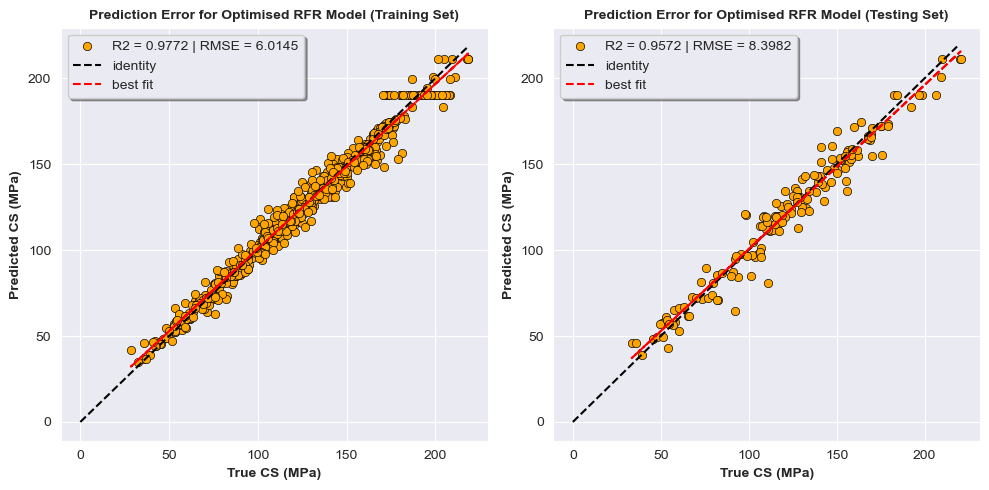

In [305]:
# create dataframe to store true and predicted compressive strength 
prediction_error_rfr_training_ops = pd.DataFrame({"True CS (MPa)": y_train, 
                                              "Predicted CS (MPa)": y_pred_train_rfr_ops})

prediction_error_rfr_testing_ops = pd.DataFrame({"True CS (MPa)": y_test, 
                                              "Predicted CS (MPa)": y_pred_test_rfr_ops})

# calculate linear regression for training and testing sets 
a_rfr_training_ops, b_rfr_training_ops = np.polyfit(prediction_error_rfr_training_ops['True CS (MPa)'], prediction_error_rfr_training_ops['Predicted CS (MPa)'], 1)
a_rfr_testing_ops, b_rfr_testing_ops = np.polyfit(prediction_error_rfr_testing_ops['True CS (MPa)'], prediction_error_rfr_testing_ops['Predicted CS (MPa)'], 1)

# adjust the figure size 
plt.figure(figsize = (10, 5))

# display the prediction error plot for training set
plt.subplot(1, 2, 1)
sns.scatterplot(x = "True CS (MPa)", 
            y = "Predicted CS (MPa)", 
            data = prediction_error_rfr_training_ops, 
            color = "orange",
            edgecolor = "black", 
            label = "R2 = {:.4f} | RMSE = {:.4f}".format(r2_train_rfr_ops, rmse_train_rfr_ops))
plt.plot([0, max(y_train)], [0, max(y_train)], color = "black", linestyle = "--", label = "identity")
plt.plot(prediction_error_rfr_training_ops['True CS (MPa)'], 
         a_rfr_training_ops * prediction_error_rfr_training_ops['True CS (MPa)'] + b_rfr_training_ops, 
         color = "red", 
         linestyle = "--", 
         label = "best fit")
plt.title("Prediction Error for Optimised RFR Model (Training Set)", fontweight = 'bold', fontsize = 10)
plt.xlabel("True CS (MPa)", fontweight = "bold", fontsize = 10)
plt.ylabel("Predicted CS (MPa)", fontweight = "bold", fontsize = 10)
plt.legend(shadow = True)

# display the prediction error plot for testing set
plt.subplot(1, 2, 2)
sns.scatterplot(x = "True CS (MPa)", 
            y = "Predicted CS (MPa)", 
            data = prediction_error_rfr_testing_ops, 
            color = "orange",
            edgecolor = "black", 
            label = "R2 = {:.4f} | RMSE = {:.4f}".format(r2_test_rfr_ops, rmse_test_rfr_ops))
plt.plot([0, max(y_train)], [0, max(y_train)], color = "black", linestyle = "--", label = "identity")
plt.plot(prediction_error_rfr_testing_ops['True CS (MPa)'], 
         a_rfr_testing_ops * prediction_error_rfr_testing_ops['True CS (MPa)'] + b_rfr_testing_ops, 
         color = "red", 
         linestyle = "--", 
         label = "best fit")
plt.title("Prediction Error for Optimised RFR Model (Testing Set)", fontweight = 'bold', fontsize = 10)
plt.xlabel("True CS (MPa)", fontweight = "bold", fontsize = 10)
plt.ylabel("Predicted CS (MPa)", fontweight = "bold", fontsize = 10)
plt.tight_layout()
plt.legend(shadow = True)
plt.show()

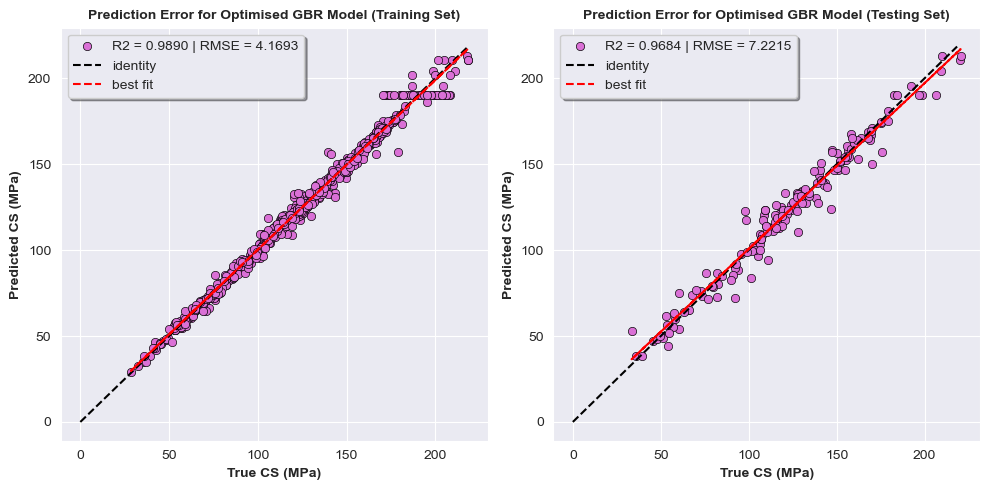

In [306]:
# create dataframe to store true and predicted compressive strength 
prediction_error_gbr_training_ops = pd.DataFrame({"True CS (MPa)": y_train, 
                                              "Predicted CS (MPa)": y_pred_train_gbr_ops})

prediction_error_gbr_testing_ops = pd.DataFrame({"True CS (MPa)": y_test, 
                                              "Predicted CS (MPa)": y_pred_test_gbr_ops})

# calculate linear regression for training and testing sets 
a_gbr_training_ops, b_gbr_training_ops = np.polyfit(prediction_error_gbr_training_ops['True CS (MPa)'], prediction_error_gbr_training_ops['Predicted CS (MPa)'], 1)
a_gbr_testing_ops, b_gbr_testing_ops = np.polyfit(prediction_error_gbr_testing_ops['True CS (MPa)'], prediction_error_gbr_testing_ops['Predicted CS (MPa)'], 1)

# adjust the figure size 
plt.figure(figsize = (10, 5))

# display the prediction error plot for training set
plt.subplot(1, 2, 1)
sns.scatterplot(x = "True CS (MPa)", 
            y = "Predicted CS (MPa)", 
            data = prediction_error_gbr_training_ops, 
            color = "orchid",
            edgecolor = "black", 
            label = "R2 = {:.4f} | RMSE = {:.4f}".format(r2_train_gbr_ops, rmse_train_gbr_ops))
plt.plot([0, max(y_train)], [0, max(y_train)], color = "black", linestyle = "--", label = "identity")
plt.plot(prediction_error_gbr_training_ops['True CS (MPa)'], 
         a_gbr_training_ops * prediction_error_gbr_training_ops['True CS (MPa)'] + b_gbr_training_ops, 
         color = "red", 
         linestyle = "--", 
         label = "best fit")
plt.title("Prediction Error for Optimised GBR Model (Training Set)", fontweight = 'bold', fontsize = 10)
plt.xlabel("True CS (MPa)", fontweight = "bold", fontsize = 10)
plt.ylabel("Predicted CS (MPa)", fontweight = "bold", fontsize = 10)
plt.legend(shadow = True)

# display the prediction error plot for testing set
plt.subplot(1, 2, 2)
sns.scatterplot(x = "True CS (MPa)", 
            y = "Predicted CS (MPa)", 
            data = prediction_error_gbr_testing_ops, 
            color = "orchid",
            edgecolor = "black", 
            label = "R2 = {:.4f} | RMSE = {:.4f}".format(r2_test_gbr_ops, rmse_test_gbr_ops))
plt.plot([0, max(y_train)], [0, max(y_train)], color = "black", linestyle = "--", label = "identity")
plt.plot(prediction_error_gbr_testing_ops['True CS (MPa)'], 
         a_gbr_testing_ops * prediction_error_gbr_testing_ops['True CS (MPa)'] + b_gbr_testing_ops, 
         color = "red", 
         linestyle = "--", 
         label = "best fit")
plt.title("Prediction Error for Optimised GBR Model (Testing Set)", fontweight = 'bold', fontsize = 10)
plt.xlabel("True CS (MPa)", fontweight = "bold", fontsize = 10)
plt.ylabel("Predicted CS (MPa)", fontweight = "bold", fontsize = 10)
plt.tight_layout()
plt.legend(shadow = True)
plt.show()

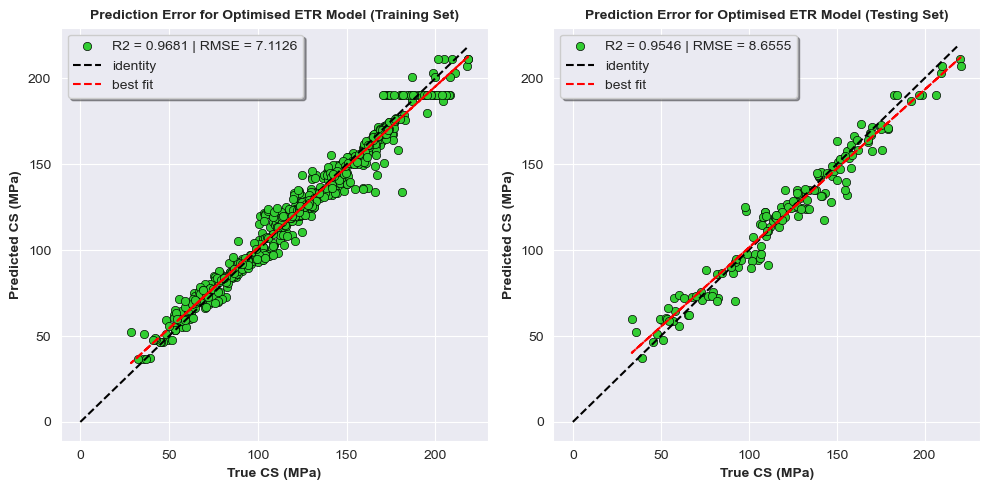

In [307]:
# create dataframe to store true and predicted compressive strength 
prediction_error_etr_training_ops = pd.DataFrame({"True CS (MPa)": y_train, 
                                              "Predicted CS (MPa)": y_pred_train_etr_ops})

prediction_error_etr_testing_ops = pd.DataFrame({"True CS (MPa)": y_test, 
                                              "Predicted CS (MPa)": y_pred_test_etr_ops})

# calculate linear regression for training and testing sets 
a_etr_training_ops, b_etr_training_ops = np.polyfit(prediction_error_etr_training_ops['True CS (MPa)'], prediction_error_etr_training_ops['Predicted CS (MPa)'], 1)
a_etr_testing_ops, b_etr_testing_ops = np.polyfit(prediction_error_etr_testing_ops['True CS (MPa)'], prediction_error_etr_testing_ops['Predicted CS (MPa)'], 1)

# adjust the figure size 
plt.figure(figsize = (10, 5))

# display the prediction error plot for training set
plt.subplot(1, 2, 1)
sns.scatterplot(x = "True CS (MPa)", 
            y = "Predicted CS (MPa)", 
            data = prediction_error_etr_training_ops, 
            color = "limegreen",
            edgecolor = "black", 
            label = "R2 = {:.4f} | RMSE = {:.4f}".format(r2_train_etr_ops, rmse_train_etr_ops))
plt.plot([0, max(y_train)], [0, max(y_train)], color = "black", linestyle = "--", label = "identity")
plt.plot(prediction_error_etr_training_ops['True CS (MPa)'], 
         a_etr_training_ops * prediction_error_etr_training_ops['True CS (MPa)'] + b_etr_training_ops, 
         color = "red", 
         linestyle = "--", 
         label = "best fit")
plt.title("Prediction Error for Optimised ETR Model (Training Set)", fontweight = 'bold', fontsize = 10)
plt.xlabel("True CS (MPa)", fontweight = "bold", fontsize = 10)
plt.ylabel("Predicted CS (MPa)", fontweight = "bold", fontsize = 10)
plt.legend(shadow = True)

# display the prediction error plot for testing set
plt.subplot(1, 2, 2)
sns.scatterplot(x = "True CS (MPa)", 
            y = "Predicted CS (MPa)", 
            data = prediction_error_etr_testing_ops, 
            color = "limegreen",
            edgecolor = "black", 
            label = "R2 = {:.4f} | RMSE = {:.4f}".format(r2_test_etr_ops, rmse_test_etr_ops))
plt.plot([0, max(y_train)], [0, max(y_train)], color = "black", linestyle = "--", label = "identity")
plt.plot(prediction_error_etr_testing_ops['True CS (MPa)'], 
         a_etr_testing_ops * prediction_error_etr_testing_ops['True CS (MPa)'] + b_etr_testing_ops, 
         color = "red", 
         linestyle = "--", 
         label = "best fit")
plt.title("Prediction Error for Optimised ETR Model (Testing Set)", fontweight = 'bold', fontsize = 10)
plt.xlabel("True CS (MPa)", fontweight = "bold", fontsize = 10)
plt.ylabel("Predicted CS (MPa)", fontweight = "bold", fontsize = 10)
plt.tight_layout()
plt.legend(shadow = True)
plt.show()

## **Feature Importances of Optimised Modelling**

##### **Decision Tree Regressor**

In [310]:
# create a SHAP tree-explainer object for the ops Decision Tree model
explainer_dtr_ops = shap.TreeExplainer(dtr_ops.best_estimator_)
# calculate the SHAP values for the ops Decision Tree model 
shap_values_explainer_dtr_ops = explainer_dtr_ops.shap_values(input_features_df)

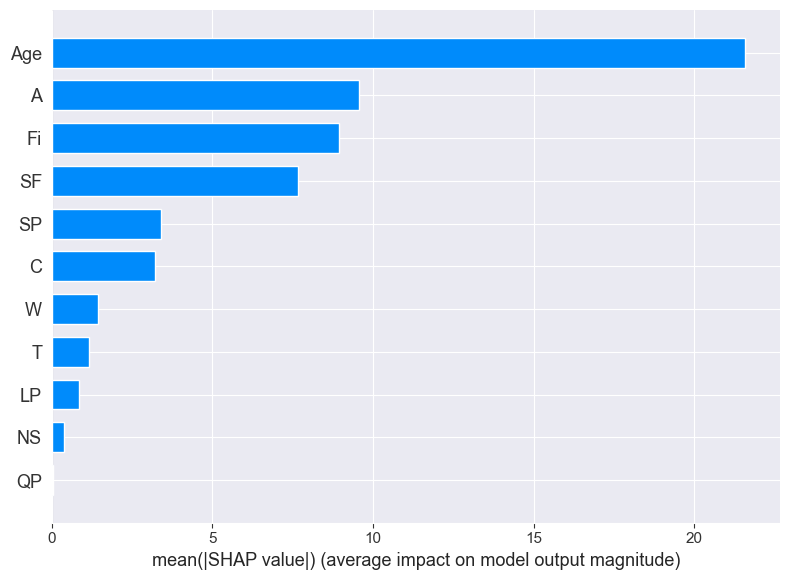

In [311]:
# visualize the feature importance based on SHAP values 
shap.summary_plot(shap_values_explainer_dtr_ops, input_features_df, plot_type = "bar")

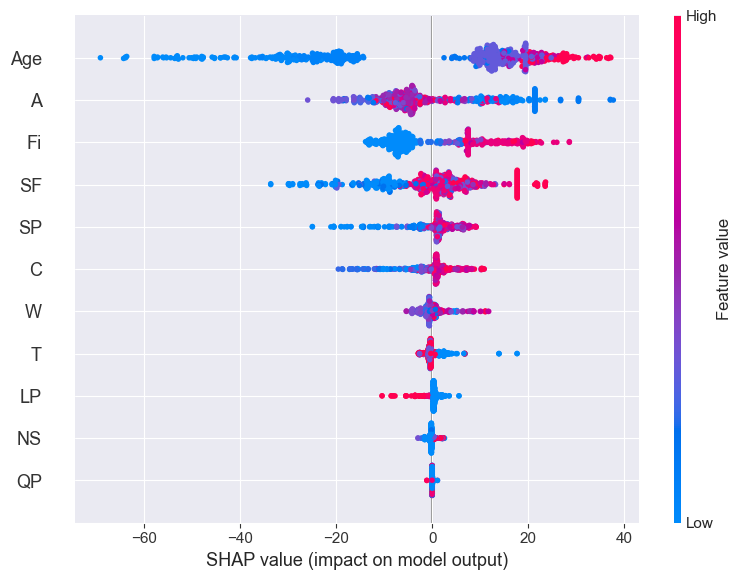

In [312]:
# visualize the feature importance based on SHAP values 
shap.summary_plot(shap_values_explainer_dtr_ops, input_features_df, plot_type = "dot")

##### **Random Forest Regressor**

In [313]:
# create a SHAP tree-explainer object for the ops random forest model
explainer_rfr_ops = shap.TreeExplainer(rfr_ops.best_estimator_)
# calculate the SHAP values for the initial random forest model 
shap_values_explainer_rfr_ops = explainer_rfr_ops.shap_values(input_features_df)

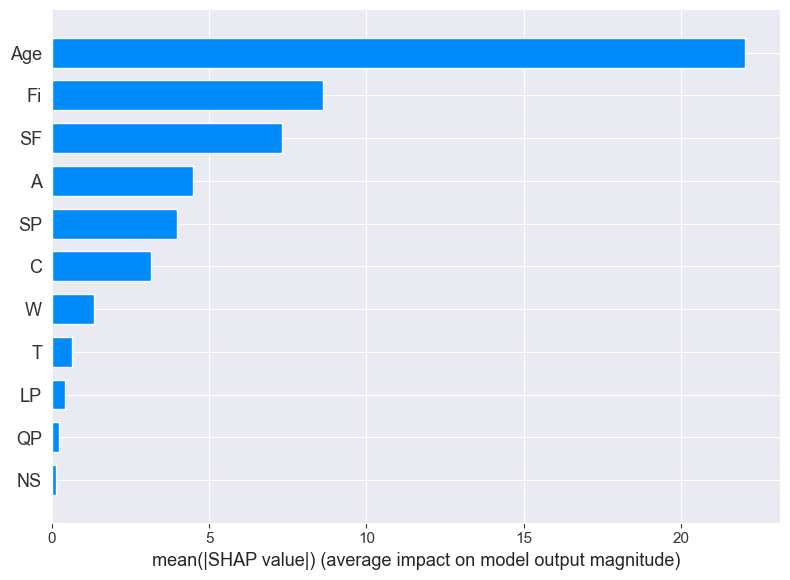

In [314]:
# visualize the feature importance based on SHAP values 
shap.summary_plot(shap_values_explainer_rfr_ops, input_features_df, plot_type = "bar")

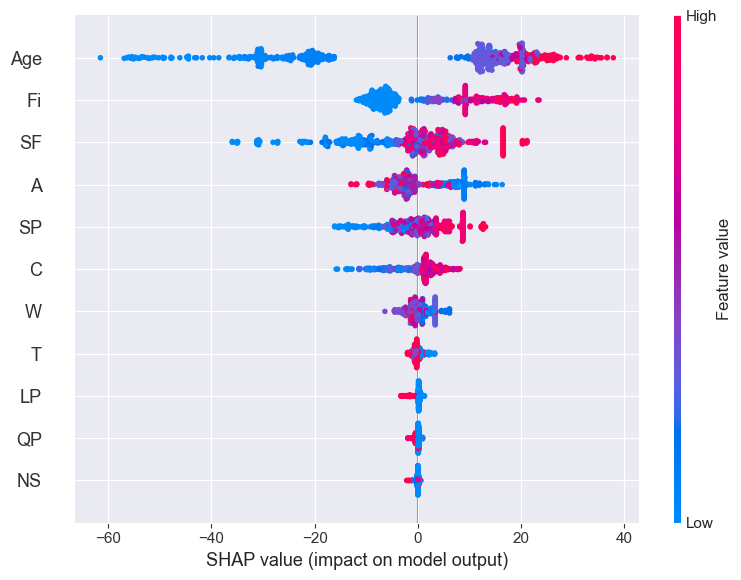

In [315]:
# visualize the feature importance based on SHAP values 
shap.summary_plot(shap_values_explainer_rfr_ops, input_features_df, plot_type = "dot")

##### **Gradient Boosting Regressor**

In [316]:
# create a SHAP tree-explainer object for the ops gradient boosting regressor model
explainer_gbr_ops = shap.TreeExplainer(gbr_ops.best_estimator_)
# calculate the SHAP values for the ops random forest model 
shap_values_explainer_gbr_ops = explainer_gbr_ops.shap_values(input_features_df)

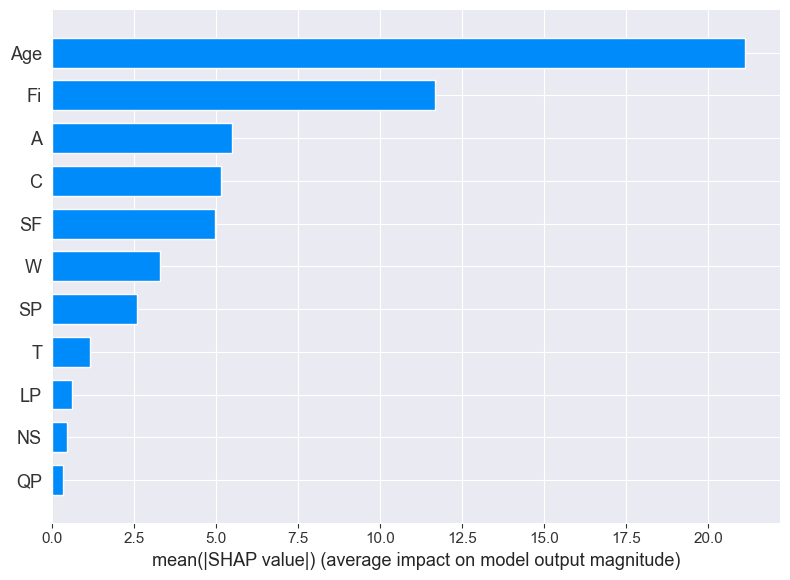

In [317]:
# visualize the feature importance based on SHAP values 
shap.summary_plot(shap_values_explainer_gbr_ops, input_features_df, plot_type = "bar")

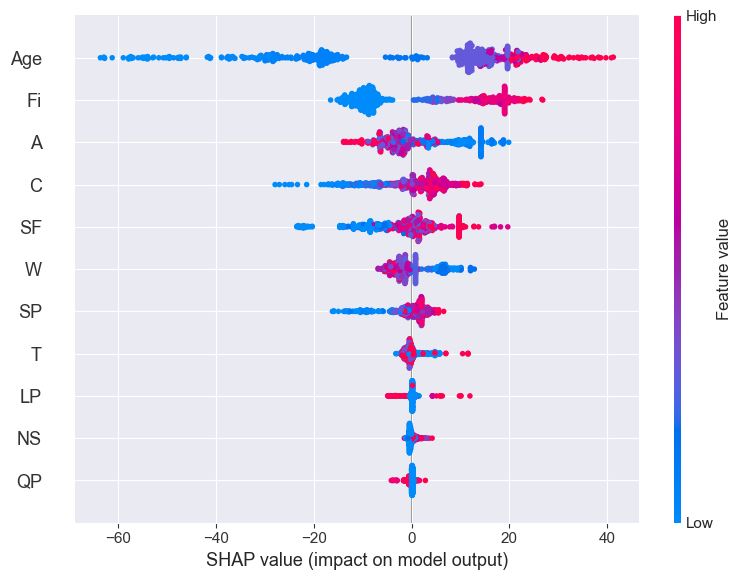

In [318]:
# visualize the feature importance based on SHAP values 
shap.summary_plot(shap_values_explainer_gbr_ops, input_features_df, plot_type = "dot")

##### **Extra Trees Regressor**

In [319]:
# create a SHAP tree-explainer object for the ops extra trees regressor model
explainer_etr_ops = shap.TreeExplainer(etr_ops.best_estimator_)
# calculate the SHAP values for the ops random forest model 
shap_values_explainer_etr_ops = explainer_etr_ops.shap_values(input_features_df)

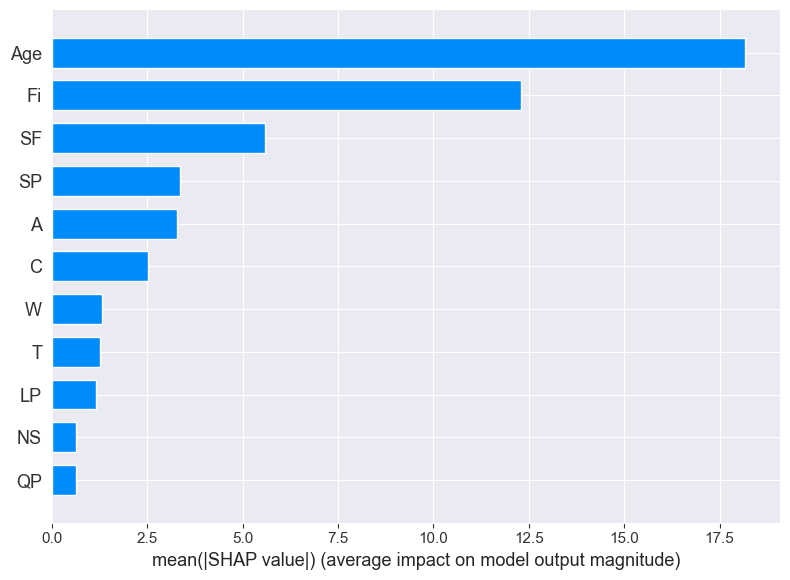

In [320]:
# visualize the feature importance based on SHAP values 
shap.summary_plot(shap_values_explainer_etr_ops, input_features_df, plot_type = "bar")

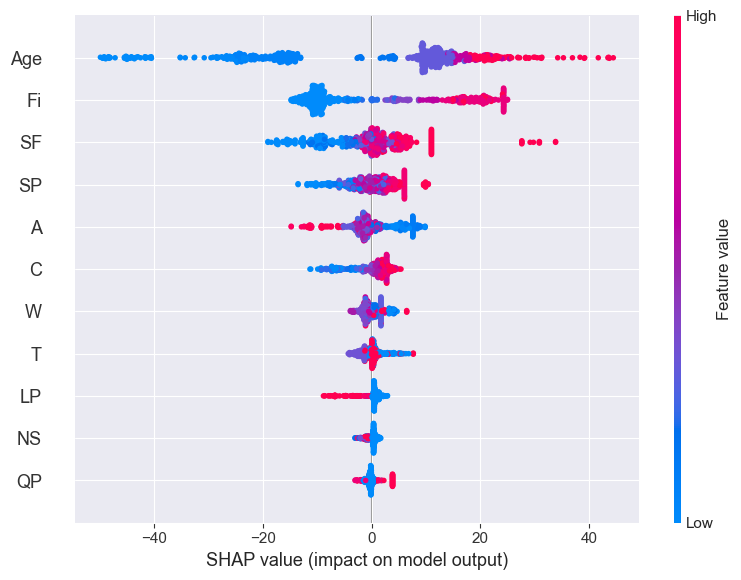

In [321]:
# visualize the feature importance based on SHAP values 
shap.summary_plot(shap_values_explainer_etr_ops, input_features_df, plot_type = "dot")

## **Cross-Validation of Optimised Gradient Boosting Regressor**